<a href="https://colab.research.google.com/github/MinaGO1/Laptop-prices-dataset/blob/main/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # to avoid any warning in the code
pd.set_option('display.max_columns' , None) # Set max columns can be displayed to none to show all columns of our data

## Feature engineering & EDA

In [ ]:
df = pd.read_csv('laptop_prices.csv') # importing our dataset
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

## First look:
> In this section, I will provide my intersets about this data for the first look
- I think I can get screen resolution from screen width and screen height
- Also I can get total storage of the laptop form primary and secondary storages
- I think if I see retina display is by only apple laptops or not
- Also I want to see what the most popular OS in our dataset
- Also I want to see what the company have the light laptops
- What is the most inches of laptops comapany
- Percentage of touch screen laptops
- The most CPU company used
- The most CPU model used for each CPU company
- The most CPU frequency in our data

First thing I want to get screen resolution and total storage

In [ ]:
#resolution
df['ScreenRes']= df['ScreenW'].astype(str) + 'x' + df['ScreenH'].astype(str)

In [ ]:
df['ScreenRes'].sample(5)

1223    1920x1080
891     3200x1800
1175    1920x1080
149      1366x768
1145    1920x1080
Name: ScreenRes, dtype: object

Ok now I want to get total storage from primary and secondary storages

In [ ]:
df['Storage'] = df['PrimaryStorage'] + df['SecondaryStorage']

In [ ]:
df['Storage']

0        128
1        128
2        256
3        512
4        256
        ... 
1270     128
1271     512
1272      64
1273    1024
1274     500
Name: Storage, Length: 1275, dtype: int64

In [ ]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,ScreenRes,Storage
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,2560x1600,128
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,1440x900,128
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,1920x1080,256
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,2880x1800,512
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,2560x1600,256


Ok now I want to order Storage column to be before primary and secondary storages and resolution before screen width and height

In [ ]:
columns = list(df.columns)
columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'PrimaryStorage',
 'SecondaryStorage',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model',
 'ScreenRes',
 'Storage']

In [ ]:
(columns.index('PrimaryStorage'),
 columns.index('ScreenW'))

(17, 9)

In [ ]:
ordered_Columns= []
for index,col in enumerate(columns):
    """This for loop check if index is screen width or primary storage and put screen resolution and storage columns in this place"""
    if index == columns.index('PrimaryStorage'):
        ordered_Columns.append('Storage')
        ordered_Columns.append('PrimaryStorage')
    elif index == columns.index('ScreenW'):
        ordered_Columns.append('ScreenRes')
        ordered_Columns.append('ScreenW')
    elif col not in ['Storage' ,'ScreenRes' , 'PrimaryStorage']:ordered_Columns.append(col)


In [ ]:
ordered_Columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenRes',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'Storage',
 'PrimaryStorage',
 'SecondaryStorage',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

In [ ]:
df = df[ordered_Columns] #apply our changes

In [ ]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
225,Acer,Aspire E5-576G,Notebook,15.6,8,Windows 10,2.20,832.0,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.7,Core i7 7500U,256,256,0,SSD,No,Nvidia,GeForce 940MX
227,Asus,Vivobook X541UV-DM1217T,Notebook,15.6,8,Windows 10,2.00,769.0,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,0,SSD,No,Nvidia,GeForce 920MX
574,Lenovo,V330-15IKB (i5-8250U/4GB/500GB/FHD/W10),Notebook,15.6,4,Windows 10,2.05,685.0,Full HD,1920x1080,1920,1080,No,No,No,Intel,1.6,Core i5 8250U,500,500,0,HDD,No,Intel,HD Graphics 620
455,Dell,Inspiron 3168,2 in 1 Convertible,11.6,4,Windows 10,1.47,479.0,Standard,1366x768,1366,768,Yes,No,No,Intel,1.6,Pentium Quad Core N3710,500,500,0,HDD,No,Intel,HD Graphics 405
988,Dell,Inspiron 5567,Notebook,15.6,8,Windows 10,2.36,749.0,Standard,1366x768,1366,768,No,No,No,Intel,2.7,Core i7 7500U,1024,1024,0,HDD,No,AMD,Radeon R7 M445
1171,HP,ProBook 450,Notebook,15.6,16,Windows 10,2.10,1159.0,Full HD,1920x1080,1920,1080,No,No,No,Intel,1.8,Core i7 8550U,512,512,0,SSD,No,Intel,UHD Graphics 620
357,Dell,Inspiron 7577,Gaming,15.6,8,Windows 10,2.65,999.0,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7300HQ,1024,1024,0,HDD,No,Nvidia,GeForce GTX 1050
607,Lenovo,IdeaPad 310-15IKB,Notebook,15.6,6,Windows 10,2.40,564.0,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,1024,1024,0,HDD,No,Intel,HD Graphics 620
1143,HP,ZBook 15,Workstation,15.6,8,Windows 7,2.59,2229.0,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.6,Core i7 6700HQ,256,256,0,SSD,No,Nvidia,Quadro M1000M
765,Acer,TravelMate P238-M,Notebook,13.3,4,Windows 10,1.60,655.0,Standard,1366x768,1366,768,No,No,No,Intel,2.3,Core i5 6200U,128,128,0,SSD,No,Intel,HD Graphics 520


I want also to make new column for secondarystorage If there are or not

In [ ]:
# I think I can get our information from secondary storage type and socondary storage
df.loc[df['SecondaryStorage'] == 0].shape[0] # length of all laptops haven't secondary storage

1067

In [ ]:
df.loc[df['SecondaryStorageType'] == 'No'].shape[0]
"""That's very good two columns are the same value so I will use secondary storage type column"""

"That's very good two columns are the same value so I will use secondary storage type column"

In [ ]:
def secondary_storage(value):
    if value != 'No':return True
    else:return False
df['SecondaryStorage?'] = [secondary_storage(v) for v in df['SecondaryStorageType']]

In [ ]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,SecondaryStorage?
1142,HP,Spectre Pro,2 in 1 Convertible,13.3,8,Windows 10,1.48,1629.0,Full HD,1920x1080,1920,1080,Yes,No,No,Intel,2.4,Core i5 6300U,256,256,0,SSD,No,Intel,HD Graphics 520,False
831,Lenovo,Thinkpad X1,Ultrabook,14.0,16,Windows 10,1.10,2099.0,Quad HD+,2560x1440,2560,1440,No,Yes,No,Intel,2.6,Core i7 6600U,512,512,0,SSD,No,Intel,HD Graphics 520,False
1128,Lenovo,Legion Y520-15IKBN,Gaming,15.6,8,No OS,2.40,989.0,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.5,Core i5 7300HQ,1152,128,1024,SSD,HDD,Nvidia,GeForce GTX 1060,True
894,MSI,GS73VR Stealth,Gaming,17.3,16,Windows 10,2.43,2649.0,4K Ultra HD,3840x2160,3840,2160,No,Yes,No,Intel,2.6,Core i7 6700HQ,2560,512,2048,SSD,HDD,Nvidia,GeForce GTX 1060,True
1079,HP,Probook 650,Notebook,15.6,4,Windows 7,2.31,940.0,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.3,Core i5 6200U,500,500,0,HDD,No,Intel,HD Graphics 520,False
252,Asus,X505BP-BR019T (A9-9420/4GB/1TB/Radeon,Notebook,15.6,4,Windows 10,1.68,469.0,Standard,1366x768,1366,768,No,No,No,AMD,3.0,A9-Series 9420,1024,1024,0,HDD,No,AMD,Radeon R5 M420,False
791,Vero,K146 (N3350/4GB/32GB/W10),Notebook,14.0,4,Windows 10,1.22,202.9,Standard,1920x1080,1920,1080,No,No,No,Intel,1.1,Celeron Dual Core N3350,32,32,0,Flash Storage,No,Intel,HD Graphics 500,False
254,Acer,Aspire 5,Notebook,17.3,4,Windows 10,3.00,702.0,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.7,Core i3 7130U,256,256,0,SSD,No,Nvidia,GeForce MX130,False
241,Asus,VivoBook Pro,Notebook,17.3,8,Windows 10,2.10,1145.0,Full HD,1920x1080,1920,1080,No,No,No,Intel,1.8,Core i7 8550U,1152,128,1024,SSD,HDD,Nvidia,GeForce 150MX,True
131,Dell,Inspiron 3567,Notebook,15.6,4,Windows 10,2.20,449.0,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.0,Core i3 6006U,1024,1024,0,HDD,No,AMD,Radeon R5 M430,False


ok now I want to order primary storage type to be before primary storage and secondary storage ? to be before primary storage type

In [ ]:
ordered_Columns = []
columns = df.columns.to_list()
for i , col in enumerate(columns):
    """In this for loop I'm ordered some storage columns"""
    if i == columns.index('SecondaryStorage'):ordered_Columns.append('PrimaryStorageType') ; \
        ordered_Columns.append('SecondaryStorage?'); \
        ordered_Columns.append('SecondaryStorage')
    elif col not in ['SecondaryStorage?' , 'PrimaryStorageType']:ordered_Columns.append(col)
ordered_Columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenRes',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'Storage',
 'PrimaryStorage',
 'PrimaryStorageType',
 'SecondaryStorage?',
 'SecondaryStorage',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

that's awesome

In [ ]:
df = df[ordered_Columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [ ]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model
974,Asus,Rog Strix,Gaming,17.3,16,Windows 10,2.73,2049.90,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.8,Core i7 7700HQ,1280,256,SSD,True,1024,HDD,Nvidia,GeForce GTX 1060
500,Asus,VivoBook E201NA,Netbook,11.6,4,Windows 10 S,1.20,340.00,Standard,1366x768,1366,768,No,No,No,Intel,1.1,Celeron Dual Core N3350,64,64,Flash Storage,False,0,No,Intel,HD Graphics 500
118,Asus,X705UV-BX074T (i3-6006U/4GB/1TB/GeForce,Notebook,17.3,4,Windows 10,2.00,564.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.0,Core i3 6006U,1024,1024,HDD,False,0,No,Nvidia,GeForce 920MX
206,Dell,Inspiron 3567,Notebook,15.6,6,Windows 10,2.30,439.00,Standard,1366x768,1366,768,Yes,No,No,Intel,2.4,Core i3 7100U,1024,1024,HDD,False,0,No,Intel,HD Graphics 620
506,Asus,ZenBook UX510UX-CN211T,Notebook,15.6,8,Windows 10,2.00,1224.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.7,Core i7 7500U,1280,256,SSD,True,1024,HDD,Intel,HD Graphics 620
558,HP,15-bw007nv (A10-9620P/6GB/128GB/Radeon,Notebook,15.6,6,Windows 10,1.91,568.90,Full HD,1920x1080,1920,1080,No,Yes,No,AMD,2.5,A10-Series A10-9620P,128,128,SSD,False,0,No,AMD,Radeon 530
1127,HP,EliteBook 820,Ultrabook,12.5,8,Windows 7,1.26,1895.00,Standard,1366x768,1366,768,No,No,No,Intel,2.4,Core i5 6300U,256,256,SSD,False,0,No,Intel,HD Graphics 520
260,Dell,Inspiron 5770,Notebook,17.3,8,Windows 10,2.80,1142.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,1.8,Core i7 8550U,1152,128,SSD,True,1024,HDD,AMD,Radeon 530
375,HP,15-bw003nv (A9-Series-9420/4GB/256GB/FHD/W10),Notebook,15.6,4,Windows 10,1.91,488.99,Full HD,1920x1080,1920,1080,No,No,No,AMD,3.0,A9-Series 9420,256,256,SSD,False,0,No,AMD,Radeon R5
744,Lenovo,Thinkpad P51s,Workstation,15.6,16,Windows 10,2.50,3299.00,4K Ultra HD,3840x2160,3840,2160,No,Yes,No,Intel,2.8,Core i7 7600U,1024,1024,SSD,False,0,No,Nvidia,Quadro M520M


Ok now let's strat with EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [717]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


ok Firstly I want to see count of laptops for each comapny

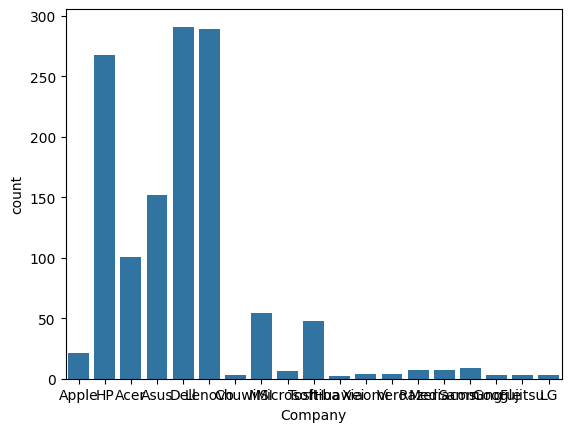

In [718]:
sns.countplot(x='Company' , data=df);
plt.show()

Ok there are overplotting so I should handle that by sorting only most 10 companies

In [719]:
top_10_companies = df['Company'].value_counts(sort=True , ascending=False).head(10)
top_10_companies# Ok that's good

Company
Dell        291
Lenovo      289
HP          268
Asus        152
Acer        101
MSI          54
Toshiba      48
Apple        21
Samsung       9
Mediacom      7
Name: count, dtype: int64

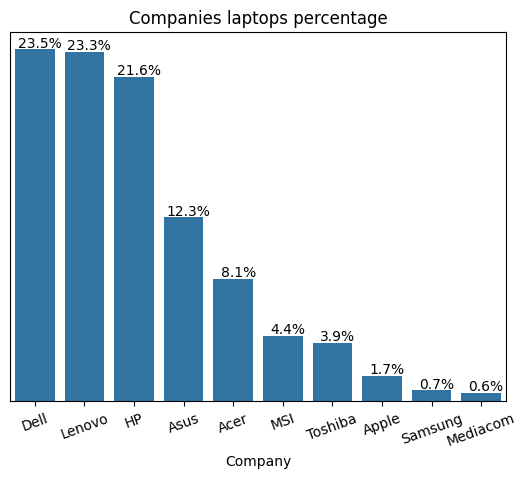

In [720]:
ax = sns.barplot(x=top_10_companies.index, y=top_10_companies.values)
for p in ax.patches:
    plt.text(p.get_x()+.5, p.get_height()+2 , # x , y
             str(
                 round(
                    (int(p.get_height()) / top_10_companies.sum())*100
                    ,1)
                )
             +'%',#percentage
            horizontalalignment='center' # centerting text
            )
plt.xticks(rotation=20)
ax.yaxis.set_visible(False)
plt.title('Companies laptops percentage')
plt.show()


In this chart we also see the percentage are very simliar in top 2 so I can say Dell and Lenovo are the most two companies make laptops in our data and we also see there are big difference between top 1 and top 10 so I think I should use mean in any column to get good result

In [721]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [722]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


now I want to see type name column

In [723]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

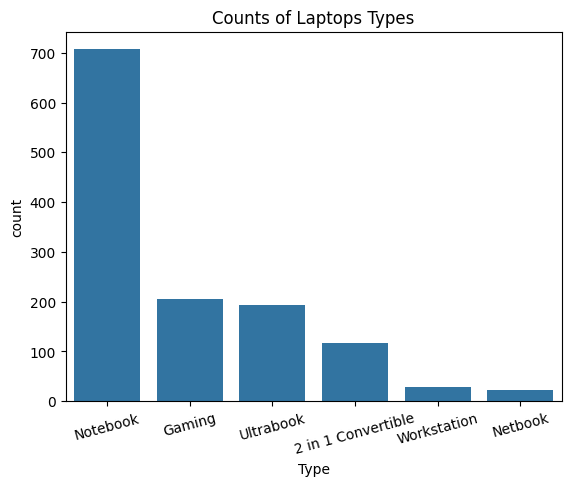

In [724]:
sns.countplot(x='TypeName' , data=df,
              order=df['TypeName'].value_counts(ascending=False, sort=True).index)
plt.xticks(rotation = 15)
plt.title('Counts of Laptops Types')
plt.xlabel('Type')
plt.show()

In this chart notebook laptops are the famouse one in our data with big difference between it and top 2(gaming) and Gaming and ultrabook are almost simliar and also workstation and netbook are very rare in our data, 2 in 1 laptops(laptops that can you convert it to tablet)

> Ok I want to plot disterbution of inches

In [725]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

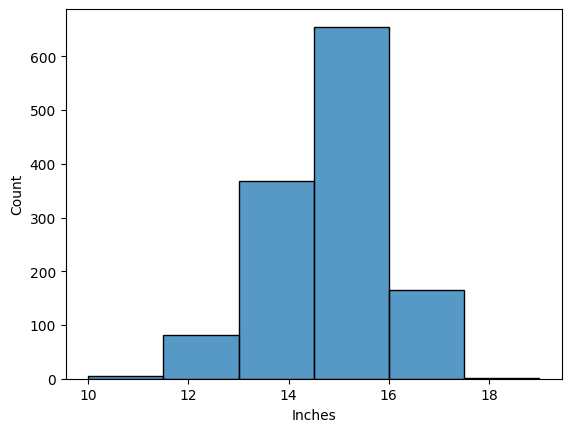

In [726]:
sns.histplot(x='Inches' , data=df, bins=np.arange(10,20,1.5))
plt.show()

In this chart I decreased number of bins to be 5 because of smaller range of inches,

we also see 15-17 inch are the most famous
14 and 12 are very simliar to each other

> now I want to see range of inches mean

In [727]:
inches_means = []
for _ in range(10_000):
    bootsample = df['Inches'].sample(320 , replace=True)
    inches_means.append(bootsample.mean())

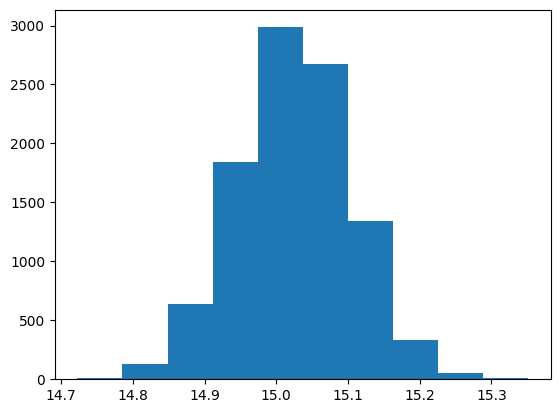

In [728]:
plt.hist(inches_means);
plt.show()

Ok so I will make 95% confidence level in my confidence interval

In [729]:
round(np.percentile(inches_means , 2.5),1) , round(np.percentile(inches_means , 97.5),1)

(np.float64(14.9), np.float64(15.2))

so 95% Inches mean is between 14.9 - 15.2 inch

In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [731]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


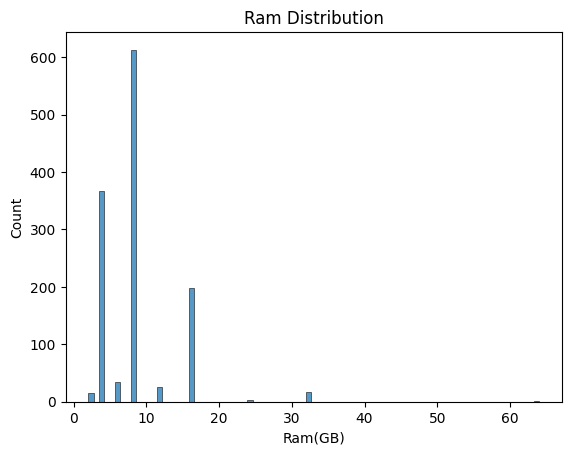

In [732]:
#Plotting Ram disterbution
sns.histplot(x='Ram' , data=df);
plt.title('Ram Distribution');
plt.xlabel('Ram(GB)');

> I want to decrease bins to be between **0** - **20** GB
- To see more information about our disterbution

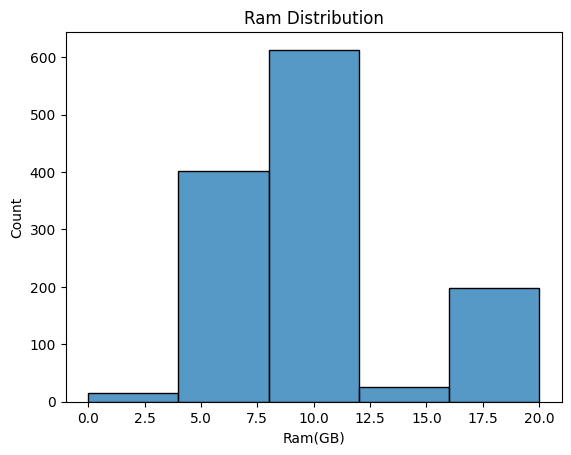

In [733]:
#Making bins
bins = np.arange(0,22.5,4)
#Plotting Ram disterbution
sns.histplot(x='Ram' , data=df , bins=bins);
plt.title('Ram Distribution');
plt.xlabel('Ram(GB)');

### In this chart:
- Most common ram are between **7.5** - **12.5** GB. In my opinion That's mean 8 GB Ram is most common ram used in laptops
Mean common ram is 8 GB
Second common ram are between **3.5G**B – **7.5**GB
- Third common ram are between **16** - **20**GB. That's mean 16 GB is third most common ram used in laptops
- I think reason to be 8 GB is the most common Ram is almost laptops are notebook laptops and notebook laptops aren't need large rams to work well. It needs only 8 GB Ram
- I think only workstation and gaming laptops needs 16 GB ram or above like 64 GB ram to work well


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [ ]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


- Now I want to see Primary storage vs Secondary storage

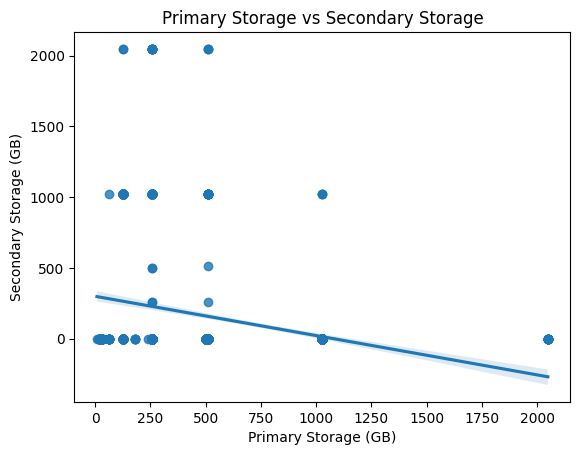

In [ ]:
sns.regplot(x='PrimaryStorage',y='SecondaryStorage' ,data=df); # fitting line in our scatterplot
plt.title('Primary Storage vs Secondary Storage');
plt.xlabel('Primary Storage (GB)');
plt.ylabel('Secondary Storage (GB)');

### In this chart:
- I see visually. There are moderate relationship between them,
- This relationship is negative like we see on this line that's means if one of them increased, anthor one will decreased.
- There are many points on 0 of secondary storage that's because there arn't secondary storage in these laptops,
- But most of these laptops have large primary storage.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [ ]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


In [ ]:
cpu_df = df.drop('Company' , axis=1).rename(columns={'CPU_company':'Company'})[['Company']] #Dropping company column to add company column of CPUs
cpu_df['Product'] = 'CPU'
gpu_df = df.drop('Company' , axis=1).rename(columns={'GPU_company':'Company'})[['Company']]
gpu_df['Product'] = 'GPU'
cpu_gpu_data = pd.concat([cpu_df , gpu_df])
#This cell to split cpu companies and gpu companies and add hue to our countplot

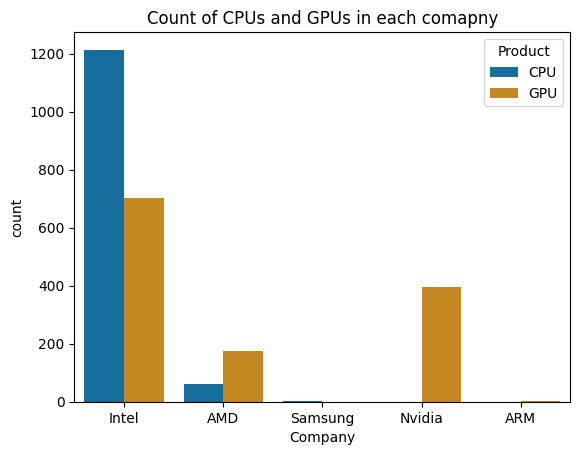

In [ ]:
sns.countplot(x='Company' , hue='Product' , data=cpu_gpu_data , palette='colorblind');
plt.title('Count of CPUs and GPUs in each comapny');

### In this chart:
- Intel has a strong hold over both CPUs and GPUs
> I think that's because Intel have many CPUs and internal GPUs, so I think that's the reason
- NVidia also has a strong hold over on GPUs
> NVidia should be top 1 in external GPUs, so it is top 2 in our data
- AMD has a medium hold over both CPUs and GPUs
- Samsung and ARM aren't almost in our data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [ ]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


- I will see storage disterbution but with hue

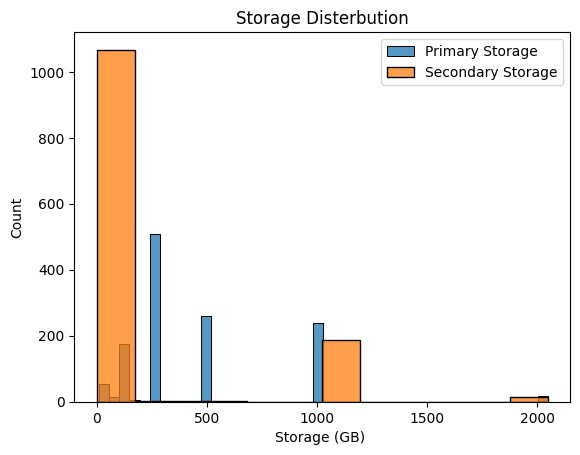

In [ ]:
sns.histplot(x='PrimaryStorage' , data=df);
sns.histplot(x='SecondaryStorage' ,data=df);
plt.title('Storage Disterbution');
plt.xlabel('Storage (GB) ');
plt.legend(['Primary Storage' , 'Secondary Storage']);

> Ok I will zoom in between **0** - **500**, then **1000** - **2000**

In [ ]:
#Making a function for this chart to avoid repeated code
def storage_chart(bins):
    """
    parms: bins: array or list of bins for hist plot
    This function plot storage disterbution using bins paramater
    first hist plot is for primary storage
    second hist plot is for secondary storage
    return: Hist plot for storage
    """
    sns.histplot(x='PrimaryStorage' , data=df , bins=bins);
    sns.histplot(x='SecondaryStorage' ,data=df , bins=bins);
    plt.title('Storage Disterbution');
    plt.xlabel('Storage (GB)');
    plt.legend(['Primary Storage' , 'Secondary Storage']);

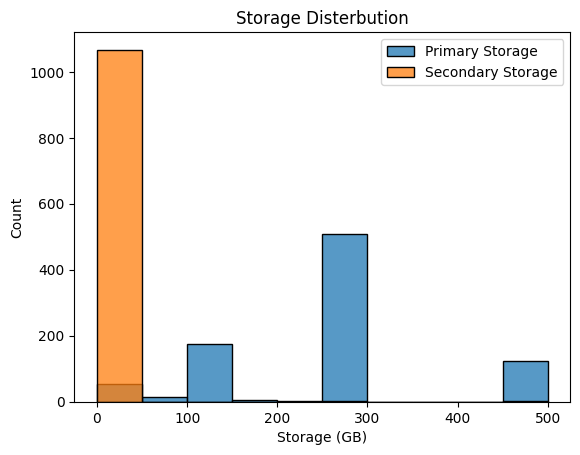

In [ ]:
bins = np.arange(0,550,50)
storage_chart(bins)

### In this chart:
- Most common secondary storage is between 0 and 50 GB
> That's expected because seondary storage is only of storing important files or some apps
- Most common primary storage is between 250 and 300 GB
> I think this scope (0 - 500 GB) for notebook laptops not for workstaion or gaming laptops
- mean common priamy storage is between 100 and 150 GB
> I think most commont storage in this scope (100 - 150 GB) in primary storage is 128 GB

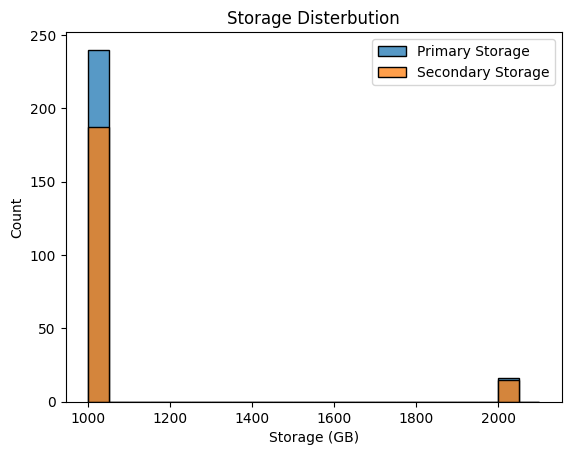

In [ ]:
storage_chart(np.arange(1000,2150,50)) # I set bins 1000 and 2100 because 2000 is empty

### In this chart:
- Most common primary and secondary storage is between **1000** and **almost 1050** GB
> This scope for gaming and workstation laptops for expensive laptops
- there some outlires values between 2000 and 2100 GB
> This scope for very high performance laptops and this scope is very rare in our data and our world and this scope is very very expensive

In [ ]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,128,SSD,False,0,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440x900,1440,900,No,No,No,Intel,1.8,Core i5,128,128,Flash Storage,False,0,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,SSD,False,0,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880x1800,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,512,SSD,False,0,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,256,SSD,False,0,No,Intel,Iris Plus Graphics 650


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [ ]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


Ok I want to make hypothesis to check there are difference between mean of **Dell** Rams and **Lenovo** Rams because They are the top 2

$$H_0 : \mu_{Dell_R}\ - \mu_{Lenovo_R} = 0$$
$$H_1 : \mu_{Dell_R} - \mu_{Lenovo_R} \neq 0$$

In [ ]:
df["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [ ]:
(df.query('Company == "Dell"')['Ram'].mean(), # mean rams of Dell
    df.query('Company == "Lenovo"')['Ram'].mean()) # mean rams of Lenovo

(np.float64(9.230240549828178), np.float64(8.055363321799309))

In [ ]:
df.shape[0]

1275

In [ ]:
# Now I will get dell and lenovo rows to make bootstrap
dell_company = df.query('Company == "Dell"')
lenovo_company = df.query('Company == "Lenovo"')

**Bootstarpping:**
```python
iterations: 10_000
return: difference between their means
diffs : list # Appending differences between dell and lenovo means
```

In [ ]:
diffs = []
for _ in range(10_000):
  dell_mean = dell_company.sample(dell_company.shape[0] , replace=True)['Ram'].mean()
  lenovo_mean = lenovo_company.sample(lenovo_company.shape[0] , replace = True)['Ram'].mean()
  diffs.append(dell_mean - lenovo_mean)

In [ ]:
#simulating null vals to plot it in chart
null_vals = np.random.normal(0 , np.std(diffs) , 10_000)

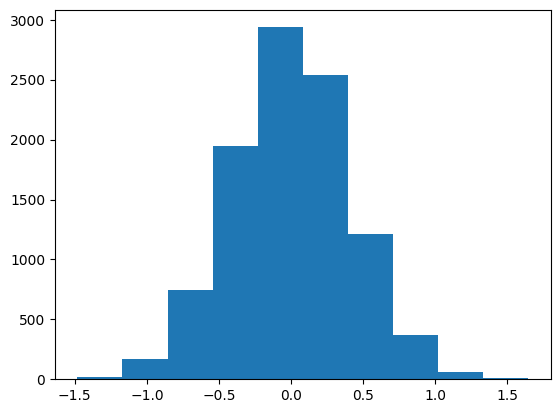

In [ ]:
plt.hist(null_vals);

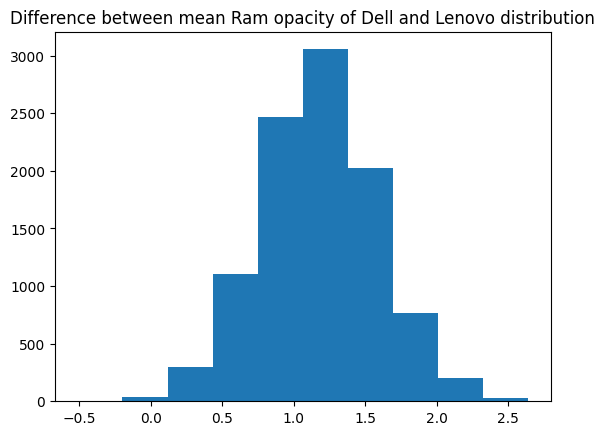

In [1139]:
# This is diffs plot
plt.hist(diffs)
plt.title('Difference between mean Ram opacity of Dell and Lenovo distribution');

In [ ]:
#Now let's get p-value
p_value = min(
    np.mean(np.array(diffs) == 0),
    np.mean(np.array(diffs)!=0)
)

In [ ]:
p_value

np.float64(0.0)

Ok p-value $\lt$ α (0.05)
> I reject null hypothesis
$$H_0 : \mu_{Dell_R}\ - \mu_{Lenovo_R} = 0$$

- I can now tell there are difference between mean dell and lenovo and in the model I will see the difference and more information
$$H_0 : \mu_{Dell_R}\ - \mu_{Lenovo_R} \neq 0$$

## Simple Models: Linear Regression

**Now** let's create models

> But we should make new dataframe for model to make good model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

Spliting companies to three groups to label econding will be  more easy

In [ ]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [ ]:
def group_company(company):
  """
  params : company : company name is got from apply funcion in company column
  This function split companies to 3 groups ('Premium' , 'Midium' , 'Low')
  to Add it to the model
  """
  if company in ['Apple', 'HP', 'Dell', 'Lenovo', 'Asus', 'Acer', 'MSI']:
    return 'premiumCompany'
  elif company in ['Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Razer', 'Samsung', 'LG']:
    return 'midCompany'
  else:
    return 'lowCompany'

In [ ]:
model_laptops_df = df.join(
    pd.DataFrame({'Company-tier' : df['Company'].apply(group_company)})) \
.drop('Company' , axis = 1)

> Apply our function `group_company` to **Company** column and naming column to **Company-tier** and join it to our laptops dataframe with dropping **Company** column

In [ ]:
model_laptops_df.head()

,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model,Company-tier
0,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,128,SSD,False,0,No,Intel,Iris Plus Graphics 640,premiumCompany
1,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440x900,1440,900,No,No,No,Intel,1.8,Core i5,128,128,Flash Storage,False,0,No,Intel,HD Graphics 6000,premiumCompany
2,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,SSD,False,0,No,Intel,HD Graphics 620,premiumCompany
3,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880x1800,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,512,SSD,False,0,No,AMD,Radeon Pro 455,premiumCompany
4,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,256,SSD,False,0,No,Intel,Iris Plus Graphics 650,premiumCompany


In [ ]:
# importing sklearn needed modules
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
#I think that's enough at this moment

In [ ]:
model_laptops_df['Company-tier'].unique()

array(['premiumCompany', 'lowCompany', 'midCompany'], dtype=object)

In [ ]:
# Making labeleconder
company_le = LabelEncoder()
model_laptops_df['Company-tier'] = company_le.fit_transform(model_laptops_df['Company-tier'])

In [ ]:
model_laptops_df['Company-tier'].unique()

array([2, 0, 1])

Premium : 2 <br>
mid : 1 <br>
low : 0

In [ ]:
model_laptops_df.head()

,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model,Company-tier
0,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,128,SSD,False,0,No,Intel,Iris Plus Graphics 640,2
1,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440x900,1440,900,No,No,No,Intel,1.8,Core i5,128,128,Flash Storage,False,0,No,Intel,HD Graphics 6000,2
2,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,SSD,False,0,No,Intel,HD Graphics 620,2
3,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880x1800,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,512,SSD,False,0,No,AMD,Radeon Pro 455,2
4,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,256,SSD,False,0,No,Intel,Iris Plus Graphics 650,2


In [ ]:
# Now I think we should drop some unnecessary columns from model laptops dataframe
model_laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product               1275 non-null   object 
 1   TypeName              1275 non-null   object 
 2   Inches                1275 non-null   float64
 3   Ram                   1275 non-null   int64  
 4   OS                    1275 non-null   object 
 5   Weight                1275 non-null   float64
 6   Price_euros           1275 non-null   float64
 7   Screen                1275 non-null   object 
 8   ScreenRes             1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

#### I think we should make more than one model:

- So I will split each section or item to specific model

In [ ]:
model_laptops_df.drop(["Product" , "ScreenW" , "ScreenH" ,
                       "ScreenRes" , "Touchscreen" , "IPSpanel" ,
                       "RetinaDisplay" ,"CPU_model" , "GPU_model",
                       'SecondaryStorage?'] , axis=1 , inplace=True)

**Reason** is most of them are name of laptops or models and most of them are false like touchscreen IPSpanel. About screen width and height and screen resolution becuase there is variable called screen is as same as screenRes variable  so I think this two varaibles are not necessary

In [ ]:
model_laptops_df.head()

,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,CPU_company,CPU_freq,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,Company-tier
0,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,Intel,2.3,128,128,SSD,0,No,Intel,2
1,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,Intel,1.8,128,128,Flash Storage,0,No,Intel,2
2,Notebook,15.6,8,No OS,1.86,575.00,Full HD,Intel,2.5,256,256,SSD,0,No,Intel,2
3,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,Intel,2.7,512,512,SSD,0,No,AMD,2
4,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,Intel,3.1,256,256,SSD,0,No,Intel,2


In [ ]:
df['TypeName'].value_counts()

TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64

I think I should group 2 in 1 Convertible, workstation and netbook laptops becuase of their data are not enough

In [ ]:
model_laptops_df['TypeName'].replace(['Workstation' , 'Netbook' , '2 in 1 Convertible'] , 'OtherTypes' , inplace=True)

In [ ]:
model_laptops_df['TypeName'].value_counts()

TypeName
Notebook      707
Gaming        205
Ultrabook     194
OtherTypes    169
Name: count, dtype: int64

In [ ]:
# Making typename column to dummy variables and make notebook as a baseline
model_laptops_df = model_laptops_df.join(pd.get_dummies(model_laptops_df['TypeName'] , dtype=int).drop('Notebook' , axis =1)).drop('TypeName' , axis=1)

In [ ]:
model_laptops_df

,Inches,Ram,OS,Weight,Price_euros,Screen,CPU_company,CPU_freq,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,Company-tier,Gaming,OtherTypes,Ultrabook
0,13.3,8,macOS,1.37,1339.69,Standard,Intel,2.3,128,128,SSD,0,No,Intel,2,0,0,1
1,13.3,8,macOS,1.34,898.94,Standard,Intel,1.8,128,128,Flash Storage,0,No,Intel,2,0,0,1
2,15.6,8,No OS,1.86,575.00,Full HD,Intel,2.5,256,256,SSD,0,No,Intel,2,0,0,0
3,15.4,16,macOS,1.83,2537.45,Standard,Intel,2.7,512,512,SSD,0,No,AMD,2,0,0,1
4,13.3,8,macOS,1.37,1803.60,Standard,Intel,3.1,256,256,SSD,0,No,Intel,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,14.0,4,Windows 10,1.80,638.00,Full HD,Intel,2.5,128,128,SSD,0,No,Intel,2,0,1,0
1271,13.3,16,Windows 10,1.30,1499.00,Quad HD+,Intel,2.5,512,512,SSD,0,No,Intel,2,0,1,0
1272,14.0,2,Windows 10,1.50,229.00,Standard,Intel,1.6,64,64,Flash Storage,0,No,Intel,2,0,0,0
1273,15.6,6,Windows 10,2.19,764.00,Standard,Intel,2.5,1024,1024,HDD,0,No,AMD,2,0,0,0


In [ ]:
model_laptops_df['OS'].value_counts()

OS
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

- I will drop android
- I will make 5 groups for linux , windows , mac os  , chrome os and no OS

In [ ]:
model_laptops_df.drop(model_laptops_df.query('OS == "Android"').index , inplace = True)

In [ ]:
model_laptops_df.query('OS == "Android"').shape[0]

0

In [ ]:
def group_os(os):
  if os in ['Windows 7' , 'Windows 10','Windows 10 S']:
    return 'Windows'
  elif os in ['Mac OS X' , 'macOS']:
    return 'mac OS'
  else: return os
model_laptops_df['OS'] = model_laptops_df['OS'].apply(group_os)

In [ ]:
model_laptops_df['OS'].value_counts()

OS
Windows      1101
No OS          66
Linux          58
Chrome OS      27
mac OS         21
Name: count, dtype: int64

Becuase of few data in each OS except windows so I will put them in variable called Other OS

In [ ]:
model_laptops_df['OS'].replace(['Chrome OS' , 'mac OS' , 'Linux',
                                'No OS'] , ['Other OS' for x in range(4)],
                               inplace=True)

In [ ]:
model_laptops_df['OS'].value_counts()

OS
Windows     1101
Other OS     172
Name: count, dtype: int64

In [ ]:
model_laptops_df = model_laptops_df.join(
    pd.get_dummies(model_laptops_df['OS'],dtype=int).drop('Windows' , axis =1)
    ).drop('OS' ,axis=1) # making OS to dummy variables and make No OS as a baseline

In [ ]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,Screen,CPU_company,CPU_freq,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,Company-tier,Gaming,OtherTypes,Ultrabook,Other OS
0,13.3,8,1.37,1339.69,Standard,Intel,2.3,128,128,SSD,0,No,Intel,2,0,0,1,1
1,13.3,8,1.34,898.94,Standard,Intel,1.8,128,128,Flash Storage,0,No,Intel,2,0,0,1,1
2,15.6,8,1.86,575.00,Full HD,Intel,2.5,256,256,SSD,0,No,Intel,2,0,0,0,1
3,15.4,16,1.83,2537.45,Standard,Intel,2.7,512,512,SSD,0,No,AMD,2,0,0,1,1
4,13.3,8,1.37,1803.60,Standard,Intel,3.1,256,256,SSD,0,No,Intel,2,0,0,1,1


In [ ]:
model_laptops_df['Screen'].value_counts()

Screen
Full HD        835
Standard       367
4K Ultra HD     43
Quad HD+        28
Name: count, dtype: int64

I think I should group 4K Ultra HD, Quad HD+ , Full HD in new category called High Resolution

In [ ]:
def group_highResolution(Res):
  if Res in ['4K Ultra HD', 'Quad HD+' , 'Full HD']:
    return 'HighResolution'
  else: return Res

model_laptops_df['Screen'] = model_laptops_df['Screen'].apply(group_highResolution)

In [ ]:
model_laptops_df['Screen'].value_counts()

Screen
HighResolution    906
Standard          367
Name: count, dtype: int64

In [ ]:
#making dummy variables also to screen
model_laptops_df = model_laptops_df.join(pd.get_dummies(model_laptops_df['Screen'], dtype=int).drop('Standard' , axis=1)).drop('Screen' , axis=1)

In [ ]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,CPU_company,CPU_freq,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,Company-tier,Gaming,OtherTypes,Ultrabook,Other OS,HighResolution
0,13.3,8,1.37,1339.69,Intel,2.3,128,128,SSD,0,No,Intel,2,0,0,1,1,0
1,13.3,8,1.34,898.94,Intel,1.8,128,128,Flash Storage,0,No,Intel,2,0,0,1,1,0
2,15.6,8,1.86,575.00,Intel,2.5,256,256,SSD,0,No,Intel,2,0,0,0,1,1
3,15.4,16,1.83,2537.45,Intel,2.7,512,512,SSD,0,No,AMD,2,0,0,1,1,0
4,13.3,8,1.37,1803.60,Intel,3.1,256,256,SSD,0,No,Intel,2,0,0,1,1,0


In [ ]:
#making dummy variables primary and secondary storage types and cpu and gpu companies
def dummy_variables(data , baseline=None , prefix=None):
  """
  This function return dummy variables for column
  parmas: data : column data
          baseline: variable will be the constant in the models
          prefix: prefix of dummy variables names
  """
  if baseline:
    return model_laptops_df.join(
        pd.get_dummies(data , dtype=np.int64).drop(baseline , axis = 1).add_prefix(prefix)
        ).drop(data.name , axis =1)
  else:
    return model_laptops_df.join(
        pd.get_dummies(data , dtype=np.int64).add_prefix(prefix)
        ).drop(data.name , axis =1)

In [ ]:
model_laptops_df['PrimaryStorageType'].value_counts()

PrimaryStorageType
SSD              837
HDD              359
Flash Storage     69
Hybrid             8
Name: count, dtype: int64

In [ ]:
# dropping hybird and flash storage type
model_laptops_df.drop(model_laptops_df
                      .query('`PrimaryStorageType`== "Hybrid" | `PrimaryStorageType`== "Flash Storage"').index ,
                      inplace=True)

In [ ]:
model_laptops_df['PrimaryStorageType'].value_counts()

PrimaryStorageType
SSD    837
HDD    359
Name: count, dtype: int64

In [ ]:
model_laptops_df = dummy_variables(model_laptops_df['PrimaryStorageType'] , 'HDD' , 'Primary_')
# making dummy variables to primary storage type and make hdd the baseline and giving dummy variables Primary_ as the prefix

In [ ]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,CPU_company,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,SecondaryStorageType,GPU_company,Company-tier,Gaming,OtherTypes,Ultrabook,Other OS,HighResolution,Primary_SSD
0,13.3,8,1.37,1339.69,Intel,2.3,128,128,0,No,Intel,2,0,0,1,1,0,1
2,15.6,8,1.86,575.00,Intel,2.5,256,256,0,No,Intel,2,0,0,0,1,1,1
3,15.4,16,1.83,2537.45,Intel,2.7,512,512,0,No,AMD,2,0,0,1,1,0,1
4,13.3,8,1.37,1803.60,Intel,3.1,256,256,0,No,Intel,2,0,0,1,1,0,1
5,15.6,4,2.10,400.00,AMD,3.0,500,500,0,No,AMD,2,0,0,0,0,0,0


In [ ]:
model_laptops_df['SecondaryStorageType'].value_counts()

SecondaryStorageType
No        989
HDD       201
SSD         4
Hybrid      2
Name: count, dtype: int64

I think I should drop SSD and Hybrid

In [ ]:
model_laptops_df.drop(model_laptops_df.query('`SecondaryStorageType` == "SSD" | `SecondaryStorageType` == "Hybrid"').index,
                      inplace = True)

In [ ]:
model_laptops_df['SecondaryStorageType'].value_counts()

SecondaryStorageType
No     989
HDD    201
Name: count, dtype: int64

In [ ]:
model_laptops_df=dummy_variables(model_laptops_df['SecondaryStorageType'], 'No' , 'Secondary_')
# making dummy variables to secondary storage type and make No the baseline and giving dummy variables Secondary_ as the prefix

In [ ]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,CPU_company,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,GPU_company,Company-tier,Gaming,OtherTypes,Ultrabook,Other OS,HighResolution,Primary_SSD,Secondary_HDD
0,13.3,8,1.37,1339.69,Intel,2.3,128,128,0,Intel,2,0,0,1,1,0,1,0
2,15.6,8,1.86,575.00,Intel,2.5,256,256,0,Intel,2,0,0,0,1,1,1,0
3,15.4,16,1.83,2537.45,Intel,2.7,512,512,0,AMD,2,0,0,1,1,0,1,0
4,13.3,8,1.37,1803.60,Intel,3.1,256,256,0,Intel,2,0,0,1,1,0,1,0
5,15.6,4,2.10,400.00,AMD,3.0,500,500,0,AMD,2,0,0,0,0,0,0,0


In [ ]:
model_laptops_df['CPU_company'].value_counts()

CPU_company
Intel    1132
AMD        58
Name: count, dtype: int64

So I will drop samsung and Samsung

In [ ]:
model_laptops_df['CPU_company'] = model_laptops_df['CPU_company'] \
                .drop(model_laptops_df.query('`CPU_company` == "Samsung" | `CPU_company` == "AMD"').index)


In [ ]:
# making dummy variables to CPU company and make intel the baseline and giving dummy variables CPU_ as the prefix
model_laptops_df = dummy_variables(model_laptops_df['CPU_company'] , 'Intel',
                                    prefix='CPU_')

In [ ]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,GPU_company,Company-tier,Gaming,OtherTypes,Ultrabook,Other OS,HighResolution,Primary_SSD,Secondary_HDD
0,13.3,8,1.37,1339.69,2.3,128,128,0,Intel,2,0,0,1,1,0,1,0
2,15.6,8,1.86,575.00,2.5,256,256,0,Intel,2,0,0,0,1,1,1,0
3,15.4,16,1.83,2537.45,2.7,512,512,0,AMD,2,0,0,1,1,0,1,0
4,13.3,8,1.37,1803.60,3.1,256,256,0,Intel,2,0,0,1,1,0,1,0
5,15.6,4,2.10,400.00,3.0,500,500,0,AMD,2,0,0,0,0,0,0,0


In [ ]:
model_laptops_df['GPU_company'].value_counts()

GPU_company
Intel     631
Nvidia    390
AMD       169
Name: count, dtype: int64

I think I should drop ARM

In [ ]:
model_laptops_df['GPU_company'] = model_laptops_df['GPU_company'].drop(model_laptops_df.query('`GPU_company` == "ARM"').index)

In [ ]:
model_laptops_df['GPU_company'].value_counts()

GPU_company
Intel     631
Nvidia    390
AMD       169
Name: count, dtype: int64

In [ ]:
model_laptops_df = dummy_variables(model_laptops_df['GPU_company'] , 'Intel' , 'GPU_')
# making dummy variables to GPU company and make intel the baseline and giving dummy variables GPU_ as the prefix

In [ ]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,Company-tier,Gaming,OtherTypes,Ultrabook,Other OS,HighResolution,Primary_SSD,Secondary_HDD,GPU_AMD,GPU_Nvidia
0,13.3,8,1.37,1339.69,2.3,128,128,0,2,0,0,1,1,0,1,0,0,0
2,15.6,8,1.86,575.00,2.5,256,256,0,2,0,0,0,1,1,1,0,0,0
3,15.4,16,1.83,2537.45,2.7,512,512,0,2,0,0,1,1,0,1,0,1,0
4,13.3,8,1.37,1803.60,3.1,256,256,0,2,0,0,1,1,0,1,0,0,0
5,15.6,4,2.10,400.00,3.0,500,500,0,2,0,0,0,0,0,0,0,1,0


In [ ]:
model_laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1274
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inches            1190 non-null   float64
 1   Ram               1190 non-null   int64  
 2   Weight            1190 non-null   float64
 3   Price_euros       1190 non-null   float64
 4   CPU_freq          1190 non-null   float64
 5   Storage           1190 non-null   int64  
 6   PrimaryStorage    1190 non-null   int64  
 7   SecondaryStorage  1190 non-null   int64  
 8   Company-tier      1190 non-null   int64  
 9   Gaming            1190 non-null   int64  
 10  OtherTypes        1190 non-null   int64  
 11  Ultrabook         1190 non-null   int64  
 12  Other OS          1190 non-null   int64  
 13  HighResolution    1190 non-null   int64  
 14  Primary_SSD       1190 non-null   int64  
 15  Secondary_HDD     1190 non-null   int64  
 16  GPU_AMD           1190 non-null   int64  
 17  

In [ ]:
model_laptops_df.dropna(inplace=True)

Last thing. Converting all continous columns to standard scale

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_continous = model_laptops_df.loc[: , :'SecondaryStorage'].drop('Price_euros' , axis = 1) # storing all continous columns
model_laptops_df[['Inches' , 'Ram' ,'Weight' ,
                  'CPU_freq' , 'Storage' ,'PrimaryStorage',
                  'SecondaryStorage']] = scale.fit_transform(X_continous)

In [ ]:
y_scale = StandardScaler()
model_laptops_df['Price_euros'] = y_scale.fit_transform(model_laptops_df['Price_euros'].values.reshape(-1,1))

In [ ]:
model_laptops_df.head() # That's very nice

,Inches,Ram,Weight,Price_euros,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,Company-tier,Gaming,OtherTypes,Ultrabook,Other OS,HighResolution,Primary_SSD,Secondary_HDD,GPU_AMD,GPU_Nvidia
0,-1.384581,-0.123929,-1.078216,0.247007,-0.108598,-1.089361,-0.921821,-0.434573,2,0,0,1,1,0,1,0,0,0
2,0.344487,-0.123929,-0.329638,-0.852005,0.318897,-0.821233,-0.569661,-0.434573,2,0,0,0,1,1,1,0,0,0
3,0.194133,1.461827,-0.375470,1.968427,0.746392,-0.284977,0.134659,-0.434573,2,0,0,1,1,0,1,0,1,0
4,-1.384581,-0.123929,-1.078216,0.913738,1.601382,-0.821233,-0.569661,-0.434573,2,0,0,1,1,0,1,0,0,0
5,0.344487,-0.916807,0.037012,-1.103515,1.387635,-0.310114,0.101644,-0.434573,2,0,0,0,0,0,0,0,1,0


In [ ]:
model_laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1274
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inches            1190 non-null   float64
 1   Ram               1190 non-null   float64
 2   Weight            1190 non-null   float64
 3   Price_euros       1190 non-null   float64
 4   CPU_freq          1190 non-null   float64
 5   Storage           1190 non-null   float64
 6   PrimaryStorage    1190 non-null   float64
 7   SecondaryStorage  1190 non-null   float64
 8   Company-tier      1190 non-null   int64  
 9   Gaming            1190 non-null   int64  
 10  OtherTypes        1190 non-null   int64  
 11  Ultrabook         1190 non-null   int64  
 12  Other OS          1190 non-null   int64  
 13  HighResolution    1190 non-null   int64  
 14  Primary_SSD       1190 non-null   int64  
 15  Secondary_HDD     1190 non-null   int64  
 16  GPU_AMD           1190 non-null   int64  
 17  

Making model

In [760]:
X = model_laptops_df.drop('Price_euros'  , axis=1)
y= model_laptops_df['Price_euros']

In [761]:
def best_random_state():
    seeds = np.arange(1,100)
    best_seed = None
    best_score = 0
    for seed in seeds:
        X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.2 ,
                                                            random_state=seed)
        reggr = LinearRegression().fit(X_train , y_train)
        score = reggr.score(X_test , y_test)
        if score > best_score:
            best_score = score
            best_seed = seed
        
    print('Best socre: ' , best_score)
    print('Best seed: ', best_seed)   
best_random_state()

Best socre:  0.7476442073360006
Best seed:  29


In [762]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.2
                                                       , random_state=29)

In [763]:
def getting_model_summary(x , y  , no_intercept=False):
  """
  this funcion to get summary for the model
  params: x : X of the model
          y : yHat
          no_intercept: removing intercept from them model
  """
  from statsmodels.api import OLS , add_constant , Logit
  if no_intercept:
    lm = OLS(y , x).fit()
  else:
    lm = OLS(y , add_constant(x)).fit()
  return lm.summary2()

In [764]:
reggr = LinearRegression().fit(X_train , y_train)

In [765]:
lm_summary = getting_model_summary(X_train , y_train) # printing model summary
print(lm_summary)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.662    
Dependent Variable: Price_euros      AIC:                1656.2117
Date:               2025-06-05 16:01 BIC:                1738.8073
No. Observations:   952              Log-Likelihood:     -811.11  
Df Model:           16               F-statistic:        117.6    
Df Residuals:       935              Prob (F-statistic): 7.28e-211
R-squared:          0.668            Scale:              0.32764  
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const              -0.1788   0.1328 -1.3468 0.1784 -0.4393  0.0817
Inches             -0.0589   0.0376 -1.5683 0.1171 -0.1326  0.0148
Ram                 0.4781   0.0264 18.1005 0.0000  0.4262  0.5299
Weight              0.1495   0.0401  3.7301 0.0002  0.0708  0.2281
CPU_freq     

R-squared and correlation cofficient are very good and this values indicate the model is good and line are fitted very good


Now let's see model features are statistically significant or not:

I will use FDR Benjamini Yekutieli correction to avoid multiple testing error because the model features is too many

This is the results without FDR Benjamini Yekutieli correction

In [766]:
pvals_df = pd.DataFrame(round(lm_summary.tables[1]['P>|t|'] , 4))
pvals_df['Significant'] = pvals_df['P>|t|'] <= 0.05

In [767]:
pvals_df['Significant'].value_counts()

Significant
False    9
True     9
Name: count, dtype: int64

This is the results after correction

In [768]:
import statsmodels.api as sm

pvals = pvals_df['P>|t|'].values.flatten() #getting values of pvals only in 1 dimension
adjusted_by = sm.stats.multipletests(pvals , method='fdr_by') # FDR Benjamini Yekutieli

In [769]:
features = round(lm_summary.tables[1]['P>|t|'] , 4).index

In [770]:
pvals_results = pd.DataFrame({
    'Features':features,
    'P-value':adjusted_by[1],
    'Significant':adjusted_by[0]
})

In [771]:
pvals_results['Significant'].value_counts()

Significant
False    10
True      8
Name: count, dtype: int64

almost 50% from the features are significant after correction, so let's see them

In [772]:
pvals_results

,Features,P-value,Significant
0,const,0.935291,False
1,Inches,0.669726,False
2,Ram,0.000000,True
3,Weight,0.001573,True
4,CPU_freq,0.000000,True
5,Storage,1.000000,False
6,PrimaryStorage,1.000000,False
7,SecondaryStorage,1.000000,False
8,Company-tier,0.300579,False
9,Gaming,0.622199,False


In [773]:
# storing not significant features to drop them from the linear regression model
notSignificant_features = pvals_results.query('`Significant` == {}'.format(np.False_)) # storing significant features

Ok we should remove all features are not siginifcant and remove intercept (const) becuase of not significant

In [774]:
filtered_model_df = model_laptops_df.drop(notSignificant_features['Features'].drop(0),
                      axis=1)

Retrain model

In [776]:
filtered_model_df

,Ram,Weight,Price_euros,CPU_freq,OtherTypes,Ultrabook,Other OS,Primary_SSD,GPU_AMD
0,-0.123929,-1.078216,0.247007,-0.108598,0,1,1,1,0
2,-0.123929,-0.329638,-0.852005,0.318897,0,0,1,1,0
3,1.461827,-0.375470,1.968427,0.746392,0,1,1,1,1
4,-0.123929,-1.078216,0.913738,1.601382,0,1,1,1,0
5,-0.916807,0.037012,-1.103515,1.387635,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1269,-0.916807,0.189783,-0.643151,0.318897,0,0,0,0,0
1270,-0.916807,-0.421301,-0.761461,0.318897,1,0,0,1,0
1271,1.461827,-1.185155,0.475967,0.318897,1,0,0,1,0
1273,-0.520368,0.174505,-0.580374,0.318897,0,0,0,0,1


In [777]:
X = filtered_model_df.drop('Price_euros' , axis =1)
y = filtered_model_df['Price_euros']

best_random_state()

Best socre:  0.7509866994221928
Best seed:  29


In [778]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 ,
                                                       random_state = 29)
reggr = LinearRegression(fit_intercept=False).fit(X_train,y_train)

Testing the final model

In [780]:
y_pred = reggr.predict(X_test)

In [781]:
pd.DataFrame({'y_pred':y_pred , 'y_true' : y_test})

,y_pred,y_true
993,-0.018885,0.260387
109,0.059387,0.448660
1206,0.017538,-0.846256
98,-0.235053,-0.849131
300,-0.523243,-0.946860
...,...,...
146,0.000781,1.216125
1139,0.549091,1.442800
1013,0.518342,1.033902
634,-0.525529,-1.104952


In [782]:
y_pred_original = y_scale.inverse_transform(y_pred.reshape(-1,1))
y_true_original = y_scale.inverse_transform(y_test.values.reshape(-1,1))

In [783]:
pd.DataFrame({'y_pred_original' : y_pred_original.flatten()  ,
              'y_true_orignal' : y_true_original.flatten()})

,y_pred_original,y_true_orignal
0,1154.682806,1349.00
1,1209.144676,1480.00
2,1180.025941,579.00
3,1004.273739,577.00
4,803.751724,509.00
...,...,...
233,1168.366712,2014.00
234,1549.879531,2171.72
235,1528.484456,1887.21
236,802.160996,399.00


Getting RMSE and $R^2$

In [790]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test , y_pred))
r2 = reggr.score(X_test ,y_test)
print('RMSE: ',rmse)
print('r2: ' , r2)

RMSE:  0.5602318475055437
r2:  0.7185034998958263


RMSE ≈ 0.560
> - This means that the model average prediction error is ≈ 0.560 standard deviations form the acual value.
-This result refers that the model is very good<br>

Accuracy ≈ 0.718 = 72%
> - This is a good percentage

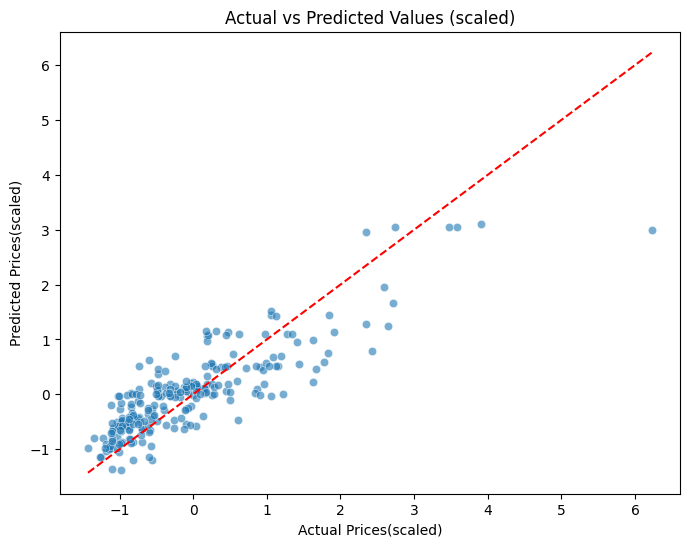

In [792]:
# Plotting scatter plot of predictions vs actual values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test , y=y_pred , alpha=0.6)
plt.plot([y_test.min() , y_test.max()] , [y_test.min() ,
                                          y_test.max()] , color='red' , linestyle = '--');
plt.title('Actual vs Predicted Values (scaled)');
plt.xlabel('Actual Prices(scaled)');
plt.ylabel('Predicted Prices(scaled)');
plt.show()

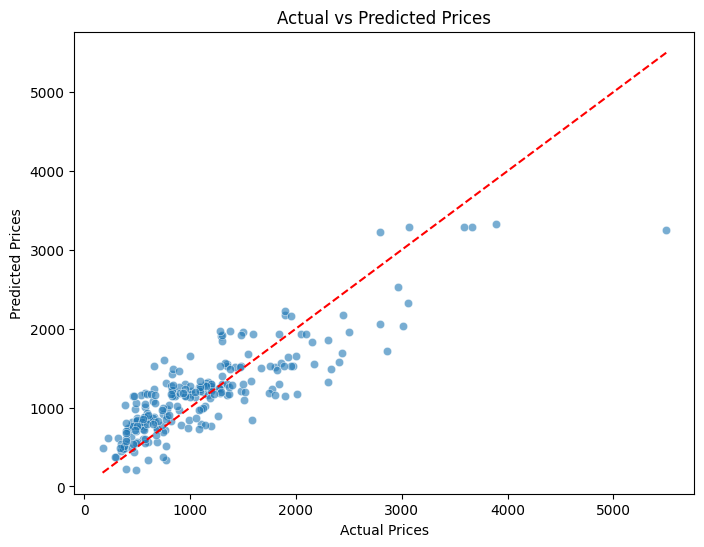

In [793]:
# Plotting scatter plot of predictions vs actual values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_true_original.flatten() , y=y_pred_original.flatten() , alpha=0.6)
plt.plot([y_true_original.min() , y_true_original.max()] , [y_true_original.min() ,
                                          y_true_original.max()] , color='red' , linestyle = '--');
plt.title('Actual vs Predicted Prices');
plt.xlabel('Actual Prices');
plt.ylabel('Predicted Prices');
plt.show()

This is prefect. This means our model are very good to predict actual prices

### Advanced Models: Random Forest

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [598]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,128,SSD,False,0,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440x900,1440,900,No,No,No,Intel,1.8,Core i5,128,128,Flash Storage,False,0,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,SSD,False,0,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880x1800,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,512,SSD,False,0,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,256,SSD,False,0,No,Intel,Iris Plus Graphics 650


Ok now I should make all continous features to classfied encode. For example Ram =>16 , =>8 , =<8. This estemation will be based on count of classfiers

In [599]:
# Firstly I should drop screen width and height and replace it with screen resolution and also secondary storage boolean variable
RF_df = df.drop(['ScreenW' , 'ScreenH' , 'SecondaryStorage?'] , axis =1)
RF_df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560x1600,No,Yes,Yes,Intel,2.3,Core i5,128,128,SSD,0,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440x900,No,No,No,Intel,1.8,Core i5,128,128,Flash Storage,0,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920x1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,SSD,0,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880x1800,No,Yes,Yes,Intel,2.7,Core i7,512,512,SSD,0,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560x1600,No,Yes,Yes,Intel,3.1,Core i5,256,256,SSD,0,No,Intel,Iris Plus Graphics 650


In [600]:
RF_df['Touchscreen'].value_counts()

Touchscreen
No     1087
Yes     188
Name: count, dtype: int64

In [601]:
RF_df['IPSpanel'].value_counts()

IPSpanel
No     918
Yes    357
Name: count, dtype: int64

In [602]:
# Making function to convert categorical variables to label encoding
def LabelEncodingFeatures(col: str):
  le = LabelEncoder()
  print('Old data order: \n', RF_df[col].unique())
  RF_df[col] = le.fit_transform(RF_df[col])
  print('New data encode \n',RF_df[col].unique())

In [603]:
RF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  Touchscreen           1275 non-null   object 
 11  IPSpanel              1275 non-null   object 
 12  RetinaDisplay         1275 non-null   object 
 13  CPU_company           1275 non-null   object 
 14  CPU_freq              1275 non-null   float64
 15  CPU_model            

In [604]:
# Ok I will make another function to group rare values in one value called other
def groupToOther(col: str , est: int=50 , other_word: str='Other'):
  """
  params:
  col : feature name
  est : estemation that will function group all values less than or equal to it
  other_word: word that replace other values or rare values
  """

  vc = RF_df[col].value_counts() # return value_counts
  other_values = vc[vc <= est] # return only values less than or equal to est
  if other_values.sum() > 50: # if other_values sum is greater than 50 make group and if value is not yes
    if 'Yes' not in other_values.index:
      if other_values.count() > 1: # if not count of unique values are greater than 1
        if col != 'Product':
          RF_df[col] = RF_df[col].replace(other_values.index , other_word)
          print('Final ouput:\n\n',RF_df[col].value_counts())
        elif col == 'Product': # this is exception becuase of few value counts in this column
          other_values = vc[vc <= 20]
          RF_df[col] = RF_df[col].replace(other_values.index, other_word)
          print('Final ouput:\n\n',RF_df[col].value_counts())
      elif other_values.count() == 1 and other_values.sum() > est: # if yes drop unique values
        RF_df.drop(RF_df.query(f'`{col}` == "{other_values.index}"').index)
  else:
    print(f'{col}. This column not have to group it')

Making this to all categorical data so I will make for loop

In [605]:
RF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  Touchscreen           1275 non-null   object 
 11  IPSpanel              1275 non-null   object 
 12  RetinaDisplay         1275 non-null   object 
 13  CPU_company           1275 non-null   object 
 14  CPU_freq              1275 non-null   float64
 15  CPU_model            

In [606]:
catCols = [col for col in RF_df.columns if RF_df[col].dtype == 'O'] # return all categorical variables

In [607]:
catCols

['Company',
 'Product',
 'TypeName',
 'OS',
 'Screen',
 'ScreenRes',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_model',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

So I will for loop like that to convert all categorical columns to label encoding

In [608]:
for col in RF_df.columns:
  if RF_df[col].dtype == 'O':
    # grouping
    groupToOther(col , other_word=f'Other{col.title()}')
    # label ecnode
    LabelEncodingFeatures(col)

Final ouput:

 Company
Dell            291
Lenovo          289
HP              268
Asus            152
OtherCompany    120
Acer            101
MSI              54
Name: count, dtype: int64
Old data order: 
 ['OtherCompany' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'MSI']
New data encode 
 [6 3 0 1 2 4 5]
Final ouput:

 Product
OtherProduct     1199
XPS 13             30
Inspiron 3567      25
250 G6             21
Name: count, dtype: int64
Old data order: 
 ['OtherProduct' '250 G6' 'Inspiron 3567' 'XPS 13']
New data encode 
 [2 0 1 3]
Final ouput:

 TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
OtherTypename          52
Name: count, dtype: int64
Old data order: 
 ['Ultrabook' 'Notebook' 'OtherTypename' 'Gaming' '2 in 1 Convertible']
New data encode 
 [4 2 3 1 0]
Final ouput:

 OS
Windows 10    1048
OtherOs        103
No OS           66
Linux           58
Name: count, dtype: int64
Old data order: 
 ['OtherOs' 'No OS' 'Windows 10

In [609]:
RF_df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model
0,6,2,4,13.3,8,2,1.37,1339.69,2,2,0,1,1,1,2.3,7,128,128,3,0,2,2,3
1,6,2,4,13.3,8,2,1.34,898.94,2,2,0,0,0,1,1.8,7,128,128,0,0,2,2,3
2,3,0,2,15.6,8,1,1.86,575.00,0,1,0,0,0,1,2.5,2,256,256,3,0,2,2,2
3,6,2,4,15.4,16,2,1.83,2537.45,2,2,0,1,1,1,2.7,7,512,512,3,0,2,0,3
4,6,2,4,13.3,8,2,1.37,1803.60,2,2,0,1,1,1,3.1,7,256,256,3,0,2,2,3


Ok now I will group continous values to 4 or 3 groups that depends on the values column

In [610]:
RF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   int64  
 1   Product               1275 non-null   int64  
 2   TypeName              1275 non-null   int64  
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   int64  
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   int64  
 9   ScreenRes             1275 non-null   int64  
 10  Touchscreen           1275 non-null   int64  
 11  IPSpanel              1275 non-null   int64  
 12  RetinaDisplay         1275 non-null   int64  
 13  CPU_company           1275 non-null   int64  
 14  CPU_freq              1275 non-null   float64
 15  CPU_model            

In [611]:
#Selecting all continuous columns
continuous_columns = RF_df[['Ram' , 'Inches' ,'Weight',
                               'Price_euros' , 'CPU_freq','Storage',
                               'PrimaryStorage','SecondaryStorage']]

In [612]:
# let's classifier these columns
def classifierContinuous(col:str , bins:list , labels:list):
  """
  Process: group continuous features values to groups and convert it to label encode

  Params:

    - col: continuous column name --> str
    - bins: range between each cut --> list
    - labels: groups names --> list
  """
  RF_df[col]  = pd.cut(x=RF_df[col] ,
                    bins=bins,
                    labels=labels) # cutted values
  print('Labeled values: \n\n' ,RF_df[col].unique() , '\n')
  le = LabelEncoder()
  RF_df[col] = le.fit_transform(RF_df[col])
  print('Transformed values: \n\n', RF_df[col].unique())

In [613]:
continuous_columns.head()

,Ram,Inches,Weight,Price_euros,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
0,8,13.3,1.37,1339.69,2.3,128,128,0
1,8,13.3,1.34,898.94,1.8,128,128,0
2,8,15.6,1.86,575.00,2.5,256,256,0
3,16,15.4,1.83,2537.45,2.7,512,512,0
4,8,13.3,1.37,1803.60,3.1,256,256,0


In [614]:
continuous_columns.describe()

,Ram,Inches,Weight,Price_euros,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,8.440784,15.022902,2.040525,1134.969059,2.302980,620.586667,444.517647,176.069020
std,5.097809,1.429470,0.669196,700.752504,0.503846,482.064003,365.537726,415.960655
min,2.000000,10.100000,0.690000,174.000000,0.900000,8.000000,8.000000,0.000000
25%,4.000000,14.000000,1.500000,609.000000,2.000000,256.000000,256.000000,0.000000
50%,8.000000,15.600000,2.040000,989.000000,2.500000,500.000000,256.000000,0.000000
75%,8.000000,15.600000,2.310000,1496.500000,2.700000,1024.000000,512.000000,0.000000
max,64.000000,18.400000,4.700000,6099.000000,3.600000,2560.000000,2048.000000,2048.000000


In [615]:
# classifier Ram feature
classifierContinuous('Ram' , [1 , 7 , 16 , 64] , ['LowRam' , 'MediumRam' , 'HighRam'])

Labeled values: 

 ['MediumRam', 'LowRam', 'HighRam']
Categories (3, object): ['LowRam' < 'MediumRam' < 'HighRam'] 

Transformed values: 

 [2 1 0]


In [616]:
RF_df['Ram'].sample(5)

599    2
357    2
921    2
130    2
579    2
Name: Ram, dtype: int64

In [617]:
# classifier Inches feature
RF_df['Inches'].describe()

count    1275.000000
mean       15.022902
std         1.429470
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.400000
Name: Inches, dtype: float64

In [618]:
RF_df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [619]:
classifierContinuous('Inches' ,
                     [10 , 13.5 , 15.5 , 18.4],
                     ['SmallScreen' , 'MediumScreen' , 'LargeScreen'])

Labeled values: 

 ['SmallScreen', 'LargeScreen', 'MediumScreen']
Categories (3, object): ['SmallScreen' < 'MediumScreen' < 'LargeScreen'] 

Transformed values: 

 [2 0 1]


In [620]:
continuous_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ram               1275 non-null   int64  
 1   Inches            1275 non-null   float64
 2   Weight            1275 non-null   float64
 3   Price_euros       1275 non-null   float64
 4   CPU_freq          1275 non-null   float64
 5   Storage           1275 non-null   int64  
 6   PrimaryStorage    1275 non-null   int64  
 7   SecondaryStorage  1275 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 79.8 KB


In [621]:
RF_df['Weight'].describe()

count    1275.000000
mean        2.040525
std         0.669196
min         0.690000
25%         1.500000
50%         2.040000
75%         2.310000
max         4.700000
Name: Weight, dtype: float64

In [622]:
classifierContinuous('Weight' ,
                     [0.5 , 1.4 , 2.5 , 4.7],
                     ['LightWeight' , 'MediumWeight' , 'HeavyWeight'])

Labeled values: 

 ['LightWeight', 'MediumWeight', 'HeavyWeight']
Categories (3, object): ['LightWeight' < 'MediumWeight' < 'HeavyWeight'] 

Transformed values: 

 [1 2 0]


In [623]:
RF_df['Price_euros'].describe()

count    1275.000000
mean     1134.969059
std       700.752504
min       174.000000
25%       609.000000
50%       989.000000
75%      1496.500000
max      6099.000000
Name: Price_euros, dtype: float64

In [624]:
# classifier Price_euros column
classifierContinuous('Price_euros' ,
                     [173 , 608 , 988 , 1496 , 6099],
                     ['LowPrice','MediumPrice' , 'HighPrice' , 'VeryHighPrice'])

Labeled values: 

 ['HighPrice', 'MediumPrice', 'LowPrice', 'VeryHighPrice']
Categories (4, object): ['LowPrice' < 'MediumPrice' < 'HighPrice' < 'VeryHighPrice'] 

Transformed values: 

 [0 2 1 3]


In [625]:
continuous_columns.describe()

,Ram,Inches,Weight,Price_euros,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,8.440784,15.022902,2.040525,1134.969059,2.302980,620.586667,444.517647,176.069020
std,5.097809,1.429470,0.669196,700.752504,0.503846,482.064003,365.537726,415.960655
min,2.000000,10.100000,0.690000,174.000000,0.900000,8.000000,8.000000,0.000000
25%,4.000000,14.000000,1.500000,609.000000,2.000000,256.000000,256.000000,0.000000
50%,8.000000,15.600000,2.040000,989.000000,2.500000,500.000000,256.000000,0.000000
75%,8.000000,15.600000,2.310000,1496.500000,2.700000,1024.000000,512.000000,0.000000
max,64.000000,18.400000,4.700000,6099.000000,3.600000,2560.000000,2048.000000,2048.000000


In [626]:
RF_df['CPU_freq'].unique()

array([2.3 , 1.8 , 2.5 , 2.7 , 3.1 , 3.  , 2.2 , 1.6 , 2.  , 2.8 , 1.2 ,
       2.9 , 2.4 , 1.44, 1.5 , 1.9 , 1.1 , 1.3 , 2.6 , 3.6 , 3.2 , 1.  ,
       2.1 , 0.9 , 1.92])

In [627]:
# classifier cpu frequency
classifierContinuous('CPU_freq' ,
                     [0,1.7 , 2.5 , 3.6],
                     ['LowCPU-Speed','MediumCPU-Speed','HighCPU-Speed'])

Labeled values: 

 ['MediumCPU-Speed', 'HighCPU-Speed', 'LowCPU-Speed']
Categories (3, object): ['LowCPU-Speed' < 'MediumCPU-Speed' < 'HighCPU-Speed'] 

Transformed values: 

 [2 0 1]


In [628]:
RF_df['SecondaryStorage'].unique()

array([   0, 1024,  256, 2048,  500,  512])

In [629]:
# classifier storages
for col in ['Storage' , 'PrimaryStorage' ,'SecondaryStorage']:
  if col != 'SecondaryStorage':
    classifierContinuous(col ,
                         [0 , 128 , 500 , 3000],
                         ['SmallStorage' ,'MediumStorage','LargeStorage'])
  else:
    classifierContinuous(col,
                         [0,64, 256 , 500 , 3000],
                         ['NoStorage' , 'SmallStorage' , 'MediumStorage' ,
                          'LargeStorage']) # To make 4 groups (NoStorage,low,...)


Labeled values: 

 ['SmallStorage', 'MediumStorage', 'LargeStorage']
Categories (3, object): ['SmallStorage' < 'MediumStorage' < 'LargeStorage'] 

Transformed values: 

 [2 1 0]
Labeled values: 

 ['SmallStorage', 'MediumStorage', 'LargeStorage']
Categories (3, object): ['SmallStorage' < 'MediumStorage' < 'LargeStorage'] 

Transformed values: 

 [2 1 0]
Labeled values: 

 [NaN, 'LargeStorage', 'SmallStorage', 'MediumStorage']
Categories (4, object): ['NoStorage' < 'SmallStorage' < 'MediumStorage' < 'LargeStorage'] 

Transformed values: 

 [3 0 2 1]


In [630]:
RF_df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model
0,6,2,4,2,2,2,1,0,2,2,0,1,1,1,2,7,2,2,3,3,2,2,3
1,6,2,4,2,2,2,1,2,2,2,0,0,0,1,2,7,2,2,0,3,2,2,3
2,3,0,2,0,2,1,2,1,0,1,0,0,0,1,2,2,1,1,3,3,2,2,2
3,6,2,4,1,2,2,2,3,2,2,0,1,1,1,0,7,0,0,3,3,2,0,3
4,6,2,4,2,2,2,1,3,2,2,0,1,1,1,0,7,1,1,3,3,2,2,3


Ok now random forest data is ready now

Random forest will return the best price to buy good laptop

In [852]:
X = RF_df.drop('Price_euros' , axis=1)
y = RF_df['Price_euros']
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=5)

In [853]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Company               1275 non-null   int64
 1   Product               1275 non-null   int64
 2   TypeName              1275 non-null   int64
 3   Inches                1275 non-null   int64
 4   Ram                   1275 non-null   int64
 5   OS                    1275 non-null   int64
 6   Weight                1275 non-null   int64
 7   Screen                1275 non-null   int64
 8   ScreenRes             1275 non-null   int64
 9   Touchscreen           1275 non-null   int64
 10  IPSpanel              1275 non-null   int64
 11  RetinaDisplay         1275 non-null   int64
 12  CPU_company           1275 non-null   int64
 13  CPU_freq              1275 non-null   int64
 14  CPU_model             1275 non-null   int64
 15  Storage               1275 non-null   int64
 16  Primar

In [862]:
from sklearn.ensemble import RandomForestClassifier
# Getting the best count of random trees
n_values = np.arange(10, 100 , 5)
best_score = 0
best_n = None
for n in n_values:
  RF_model = RandomForestClassifier(n_estimators=n , random_state = 0)
  RF_model.fit(X_train , y_train)
  score = RF_model.score(X_test , y_test)
  if score > best_score:
    best_score = score
    best_n = n
print('Best score: ', best_score)
print('best n: ', best_n)

Best score:  0.7568627450980392
best n:  30


In [863]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=30 , random_state= 0)
RF_model.fit(X_train , y_train)

RandomForestClassifier(n_estimators=30, random_state=0)

In [864]:
# Testing score of the model to see if I should increase random trees or not
RF_model.score(X_test , y_test)

0.7568627450980392

After trying the best value for n_estimators = 10

In [865]:
y_pred = RF_model.predict(X_test)

In [866]:
# returning f1_score
from sklearn.metrics import f1_score
f1_score(y_test , y_pred , average = 'weighted')

0.7526226181869837

f1_score is very good

[[35  0 12 17]
 [ 0 59  7  0]
 [ 3  9 36  2]
 [11  0  1 63]]


[[59  7  0  0]
 [ 9 36  3  2]
 [ 0 12 35 17]
 [ 0  1 11 63]]


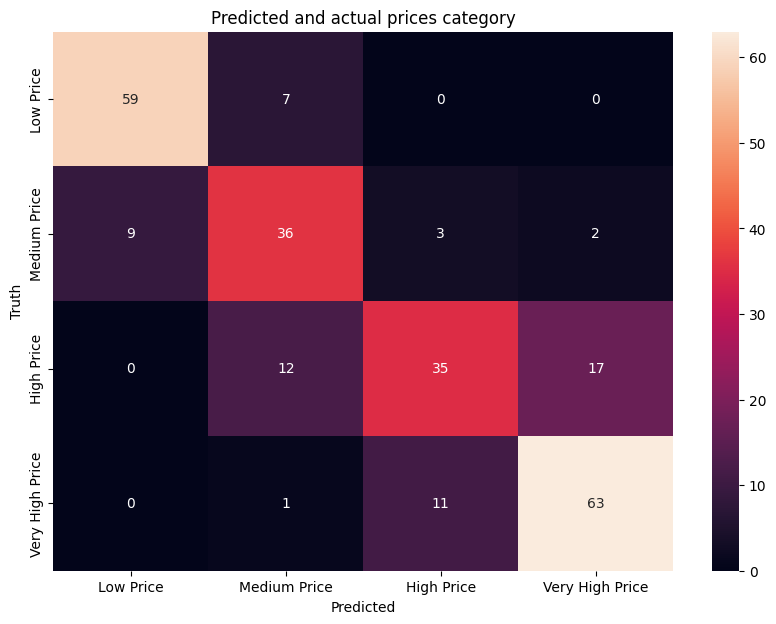

In [868]:
# Making heatmap for y predicted and truth
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
print(cm)
print('\n')


cm[[0,1],:] = cm[[1,0],:]
cm[[1,2] , :] = cm[[2,1] , :]

cm[:,[0,1]] = cm[:,[1,0]]
cm[:,[1,2]] = cm[:,[2,1]]

print(cm)
plt.figure(figsize=(10,7))
ax = sns.heatmap(cm , annot=True);
ax.set_yticklabels(['Low Price' , 'Medium Price' , 'High Price' , 'Very High Price'])
ax.set_xticklabels(['Low Price' , 'Medium Price' , 'High Price' , 'Very High Price'])
plt.xlabel('Predicted');
plt.ylabel('Truth');
plt.title('Predicted and actual prices category');

KNN model

In [869]:
# Import needed modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [870]:
# I will use the data of random forest
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 ,
                                                       random_state=70)
"""
First I should get best k estimator for KNN algorithm, so I will use cross validation
"""

# Creating random odd numbers
k_values = np.arange(1, 30 , 2)
best_accuarcy = 0.0 # Making variable called best accuracy to store the final best accuracy on it
best_k:int = None # To store best k

In [871]:
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn , X_train , y_train , scoring='accuracy')
  avg_accuracy = score.mean()
  if avg_accuracy > best_accuarcy:
    best_accuarcy = avg_accuracy
    best_k = k

print('Best k: ',best_k)
print('Avg. accuracy: ', avg_accuracy)

Best k:  5
Avg. accuracy:  0.6205882352941177


In [872]:
# Creating model and add best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=np.int64(5))

In [873]:
# Now testing the model
y_pred = knn.predict(X_test)

In [874]:
# getting accuracy and model score
knn.score(X_test , y_test)

0.6588235294117647

Ok accuracy of model is medium and is almost equal to 66%

In [875]:
f1_score(y_test , y_pred , average='weighted')

0.65394572334521

f1_score told us that our model is moderate and simliar to accuracy or model score

Ok I want to f1 score for each category

In [809]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.48      0.48        63
           1       0.80      0.88      0.84        65
           2       0.66      0.54      0.60        68
           3       0.66      0.75      0.70        59

    accuracy                           0.66       255
   macro avg       0.65      0.66      0.65       255
weighted avg       0.65      0.66      0.65       255



Ok we should explain this labeled categories of prices
- 3 → VeryHigh
- 0 → High
- 2 → Medium
- 1 → Low

two Lowest f1_score are High and Medium prices
Top 2 Low and VeryHigh

So the reason of making f1_score is moderate High and Medium prices are very low compared to ohter prices categories

> But the reason that makes High price is 50% becuase precision and recall are very simliar and the reason that makes Medium price is 53& because recall value is less than 0.5 so f1_score is effected

In [646]:
# Making confusion matrix and plot it on heatmap
cm = confusion_matrix(y_test , y_pred)
cm

array([[30,  0, 12, 21],
       [ 2, 57,  6,  0],
       [15, 14, 37,  2],
       [14,  0,  1, 44]])

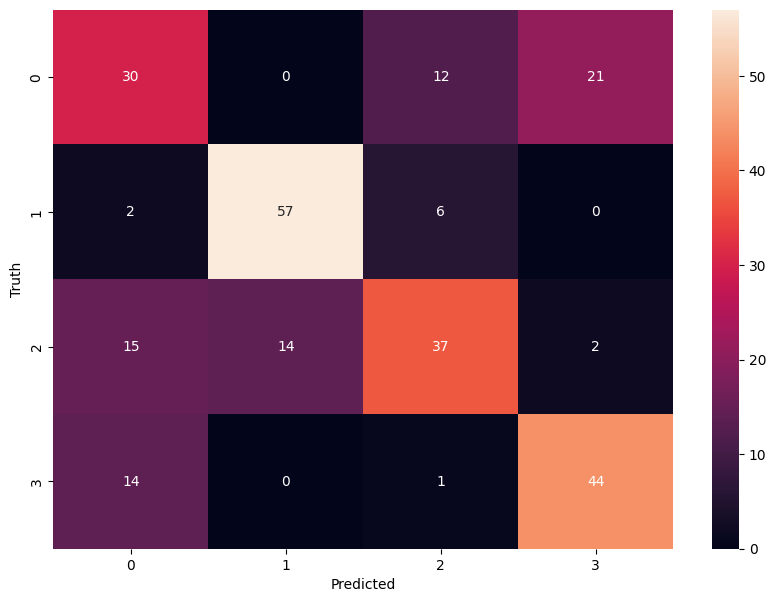

In [647]:
#plot it on heatmap chart
plt.figure(figsize = (10,7))
sns.heatmap(cm , annot = True);
plt.xlabel('Predicted');
plt.ylabel('Truth');

This results are very good and this model accuracy 70% also very good model

## Clustering and interpret the results

In [921]:
# Making clustering k-means
x = df[['Ram' , 'Price_euros']]
scaler = StandardScaler()
x[['Ram' , 'Price_euros']] = scaler.fit_transform(x)

In [922]:
x

,Ram,Price_euros
0,-0.086499,0.292259
1,-0.086499,-0.336954
2,-0.086499,-0.799410
3,1.483418,2.002178
4,-0.086499,0.954536
...,...,...
1270,-0.871458,-0.709472
1271,1.483418,0.519690
1272,-1.263937,-1.293359
1273,-0.478979,-0.529594


<Axes: xlabel='Ram', ylabel='Price_euros'>

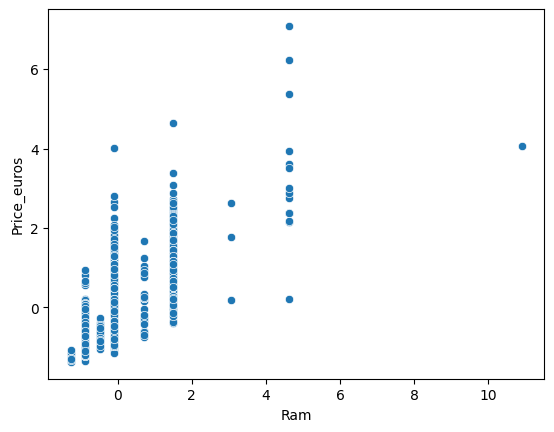

In [923]:
sns.scatterplot(x = x['Ram'] , y= x['Price_euros'])

In [924]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [925]:
def best_k(data:pd.DataFrame , max_k:int):
  """
  To get best count of clusters for this model
  """
  means = []
  inertia = []
  silhouette_scores = []
  for k in range(2 , max_k):
    kmeans = KMeans(k , random_state=7)
    clusters_labels = kmeans.fit_predict(data)
    score = silhouette_score(data , clusters_labels)
    means.append(k)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(score)
  plt.figure(figsize=(14,7))  
    
  plt.subplot(1,2,1)
  plt.plot(means , inertia , 'o-')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.grid()
  
  plt.subplot(1,2,2)
  plt.plot(means ,silhouette_scores , 'o-' , color= 'Orange')
  plt.xlabel('Number of clusters')
  plt.ylabel('silhouette score')
  
  plt.grid()
  plt.show()

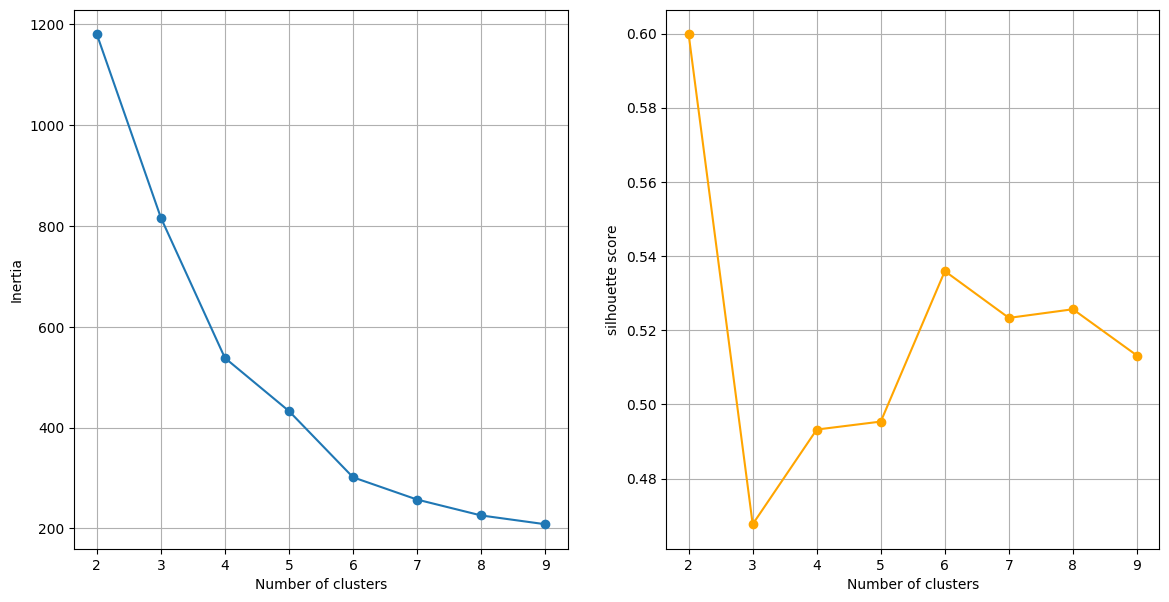

In [926]:
best_k(x , 10)

In [927]:
kmeans = KMeans(5 , random_state=7)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=7)

In [928]:
x['Kmeans_labels'] = kmeans.labels_

In [929]:
# inversing the native scale plot to a chart
x[['Ram' , 'Price_euros']] = scaler.inverse_transform(x[['Ram' , 'Price_euros']])
x

,Ram,Price_euros,Kmeans_labels
0,8.0,1339.69,2
1,8.0,898.94,2
2,8.0,575.00,0
3,16.0,2537.45,1
4,8.0,1803.60,2
...,...,...,...
1270,4.0,638.00,0
1271,16.0,1499.00,4
1272,2.0,229.00,0
1273,6.0,764.00,0


In [930]:
# Clusters centers
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_) , columns=['Ram' , 'Price'])

In [931]:
centroids

,Ram,Price
0,4.905812,542.972465
1,14.495050,2525.843168
2,7.966038,1244.147887
3,33.777778,3444.303333
4,15.905512,1571.939291


| cluster | label|
------|-------
0     | Very Low Speces
2     | Low
4     | Mid-Range
1     | High
3     | High-End

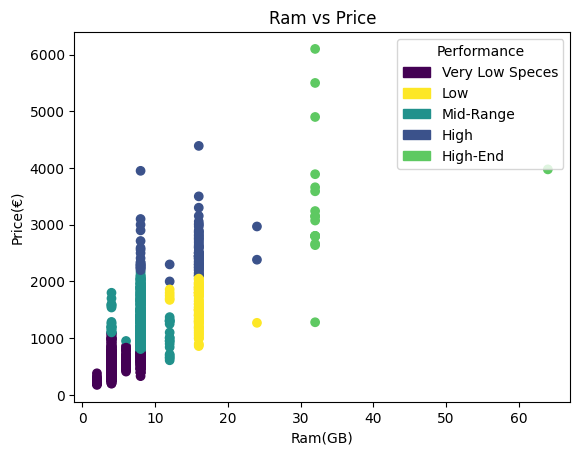

In [932]:
# Making plot for the results
g = plt.scatter(x='Ram' , y = 'Price_euros', c='Kmeans_labels',
            data=x)
labels = {
    0 : 'Very Low Speces',
    4: 'Low' ,
    2: 'Mid-Range',
    1: 'High',
    3: 'High-End'
}

order = [0,4,2,1,3]
import matplotlib.patches as mpatches
patches= [mpatches.Patch(
    color=g.cmap(g.norm(i)),
    label=labels[i]
)
for i in order
          ]
plt.legend(handles=patches ,title='Performance')
plt.title('Ram vs Price')
plt.xlabel('Ram(GB)')
plt.ylabel('Price(€)');
plt.show()

In [933]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

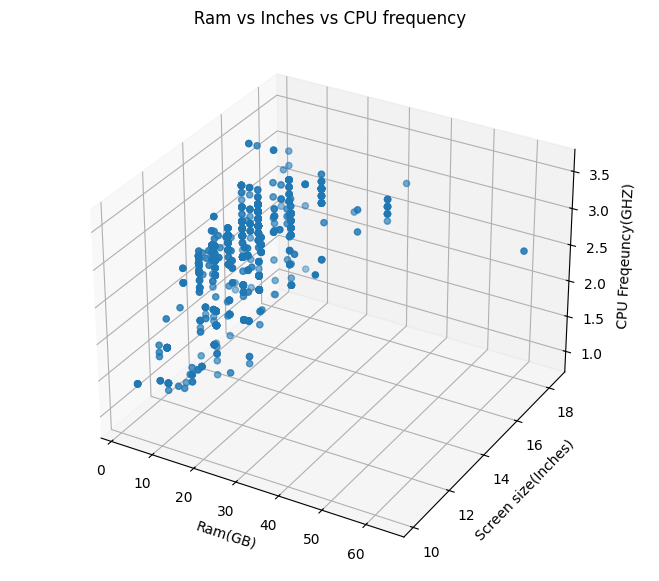

In [1076]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(
    'Ram',
    'Inches',
    'CPU_freq',
    
    data=df
);
ax.set_xlabel('Ram(GB)')
ax.set_ylabel('Screen size(Inches)')
ax.set_zlabel('CPU Freqeuncy(GHZ)');
ax.set_title(" "*35 + 'Ram vs Inches vs CPU frequency' + " " *35);


This are outlires I should take care of them

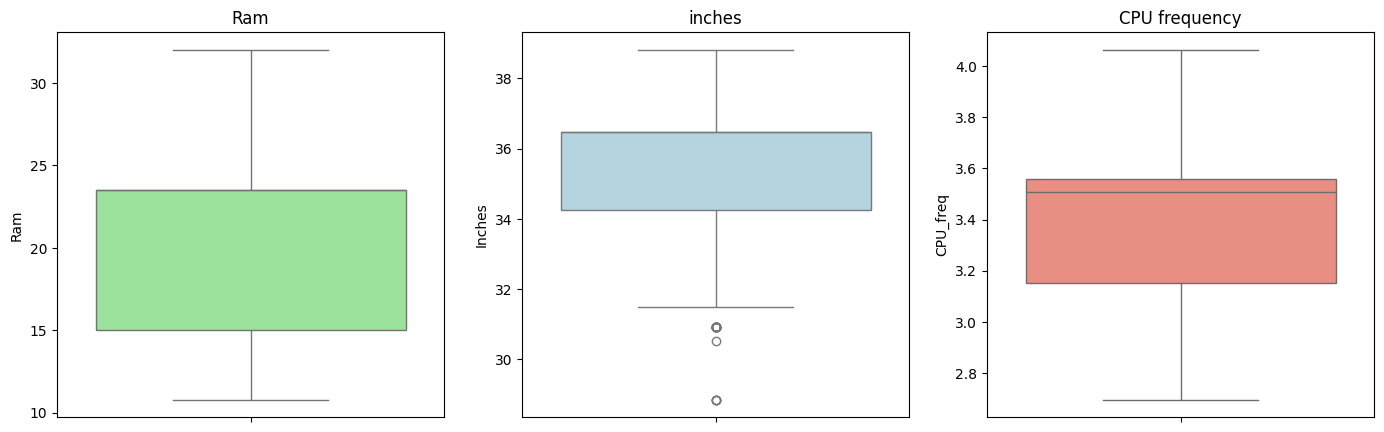

In [1077]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.boxplot(data=x['Ram'],color='lightgreen');
plt.title('Ram');
plt.subplot(1,3,2);
sns.boxplot(data=x['Inches'] , color='lightblue');
plt.title('inches');
plt.subplot(1,3,3);
sns.boxplot(data=x['CPU_freq'] , color='salmon');
plt.title('CPU frequency');

rams boxplot are very squelched so I will remove this sperate this outilres if they are many

In [1078]:
Ram_Q1 = df['Ram'].quantile(0.25)
Ram_Q3 = df['Ram'].quantile(0.75)

IQR = Ram_Q3 - Ram_Q1

# getting outlires 
Ram_outlires_df=df[
        (df['Ram'] > (Ram_Q3 + 1.5 * IQR)) |
        (df['Ram'] < (Ram_Q1 - 1.5 * IQR))
    ]
Ram_outlires_df.shape[0] / df.shape[0] *100


17.176470588235293

17 % is a good percentage to gain more information from them so I will sperate them

In [1079]:
non_Ram_outlires_df = df[~df.index.isin(Ram_outlires_df.index)]

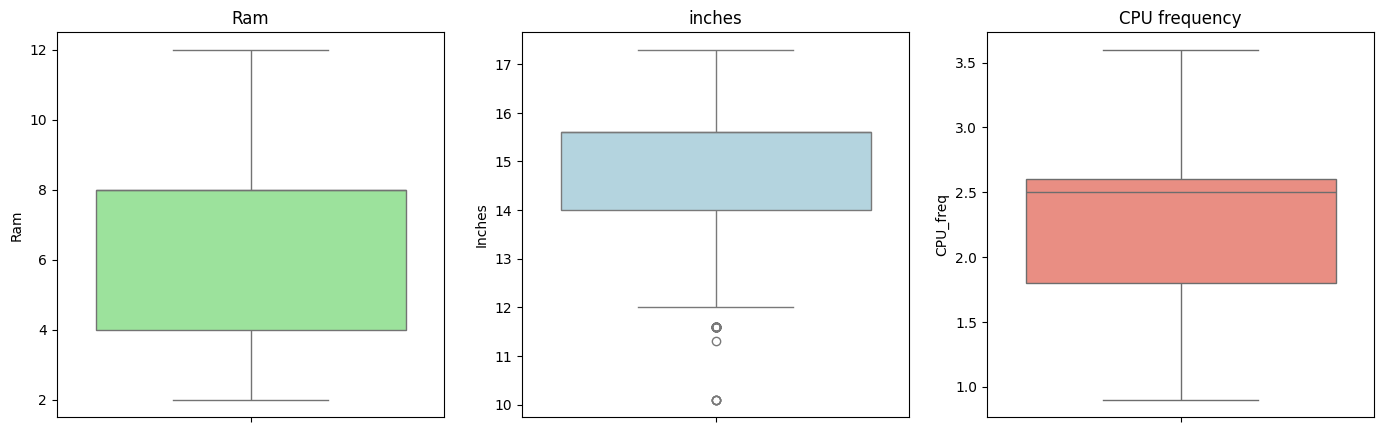

In [1080]:
# boxplots for non ram outlires
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.boxplot(data=non_Ram_outlires_df['Ram'],color='lightgreen');
plt.title('Ram');
plt.subplot(1,3,2);
sns.boxplot(data=non_Ram_outlires_df['Inches'] , color='lightblue');
plt.title('inches');
plt.subplot(1,3,3);
sns.boxplot(data=non_Ram_outlires_df['CPU_freq'] , color='salmon');
plt.title('CPU frequency');

In [1081]:
x = non_Ram_outlires_df[[
    'Ram' , 'Inches' , 'CPU_freq'
]]
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

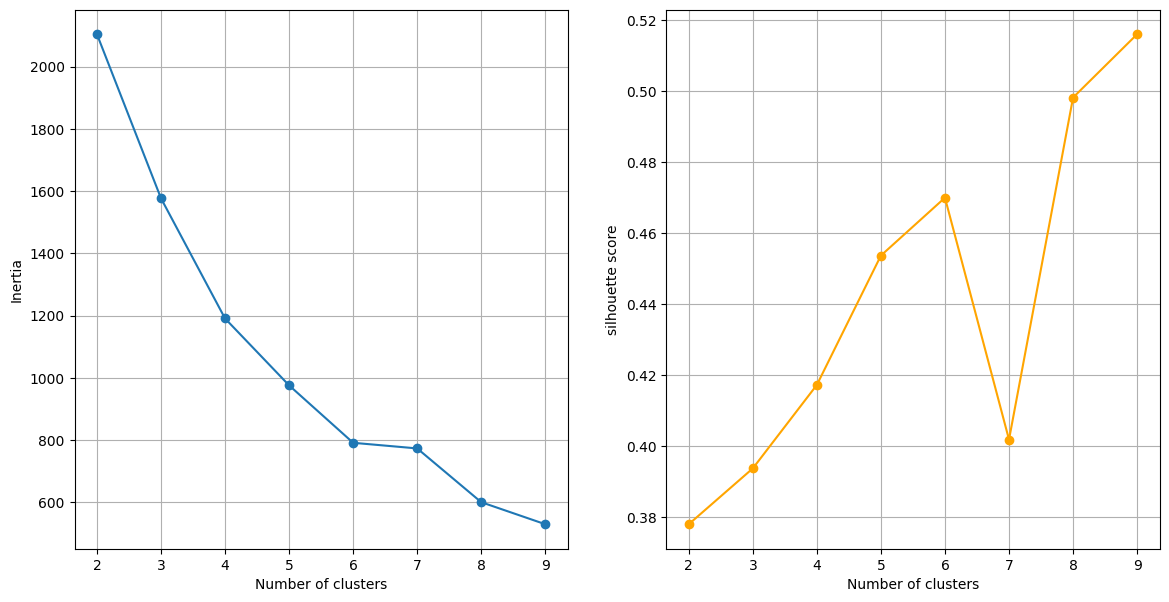

In [1082]:
best_k(x_scaled , 10)

In [1083]:
kmeans = KMeans(4 , random_state=7)
clusters_labels = kmeans.fit_predict(x)
non_Ram_outlires_df['Clusters'] = clusters_labels
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728' , # Red
                } 

In [1084]:
pd.DataFrame(scale.inverse_transform(kmeans.cluster_centers_) , columns = ['Ram' , 'Inches' , 'CPU freq'])

,Ram,Inches,CPU freq
0,24.008363,36.883109,3.472678
1,15.494375,36.655358,3.331740
2,23.627310,33.510743,3.386234
3,14.633569,33.024105,3.171921


In [1085]:
x[['Ram' , 'Inches' , 'CPU_freq']] = scale.inverse_transform(x)

Text(0, 0.5, 'CPU frequency')

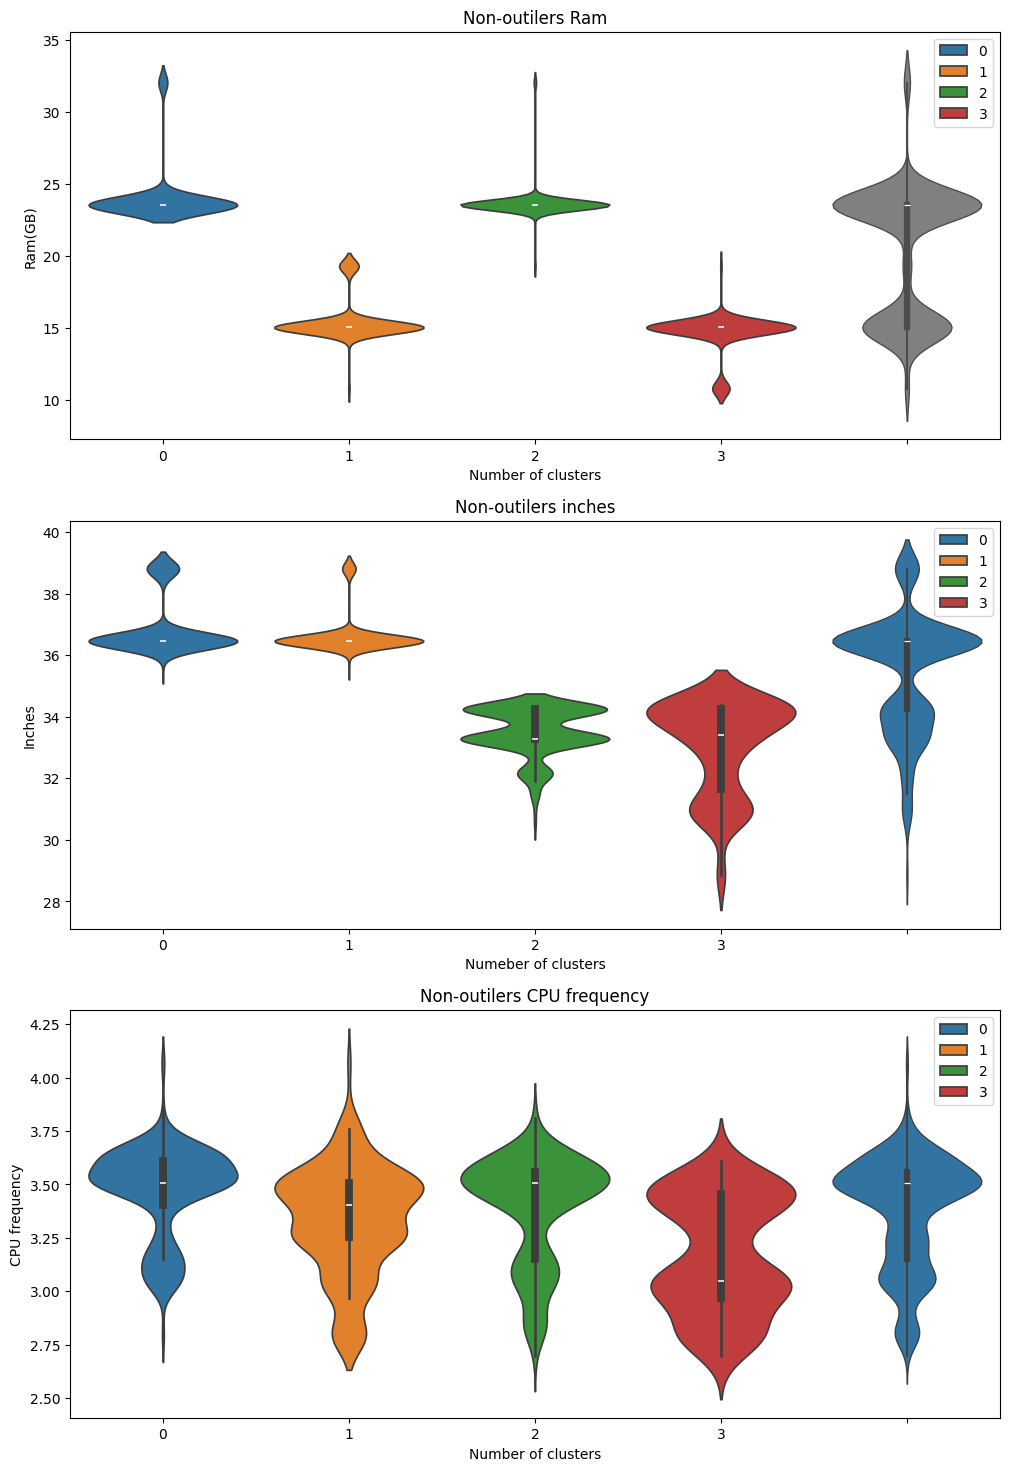

In [1086]:
plt.figure(figsize=(12,18))
plt.subplot(3,1,1)
sns.violinplot(x=non_Ram_outlires_df['Clusters'] , y=x['Ram'] , palette=cluster_colors , hue=non_Ram_outlires_df['Clusters'])
sns.violinplot(y=x['Ram'],color='gray' , linewidth=1)
plt.title('Non-outilers Ram')
plt.xlabel('Number of clusters')
plt.ylabel('Ram(GB)')
plt.subplot(3,1,2)
sns.violinplot(x=non_Ram_outlires_df['Clusters'],y=x['Inches'] , palette=cluster_colors , hue=non_Ram_outlires_df['Clusters'])
sns.violinplot(y=x['Inches'] , linewidth=1)
plt.title('Non-outilers inches');
plt.xlabel('Numeber of clusters')
plt.ylabel('Inches')
plt.subplot(3,1,3)
sns.violinplot(x=non_Ram_outlires_df['Clusters'] ,y=x['CPU_freq'] , palette=cluster_colors , hue=non_Ram_outlires_df['Clusters'])
sns.violinplot(y=x['CPU_freq'] , linewidth=1)
plt.title('Non-outilers CPU frequency')
plt.xlabel('Number of clusters')
plt.ylabel('CPU frequency')

Cluster 0(High-End): This cluster for heavy work like programming ,3d designing, designing or video editingor heavy games require very high preformance but this cluster is very expensive becuase ram values is above 25 GB , inches above 36 inches and CPU freqeuncy above 3.50GHZ

---
Cluster 1(Mid working): This cluster have above 36 inches values but have most common ram values is 16 GB and have big range in cpu frequency most common is above 3.25GHZ,so this cluster for programming and designing and some light 3d designing or video editing  

---

Cluter 2(Gaming): This cluster have most common ram values are above 20GB but have Above 33 inches values and also have big range in CPU frequency most 
common values are above 3.5GHZ,so this cluster for gaming

---

Cluster 3(Heavy working): This cluster have less than 17 GB rams and less than 35 inches .Also, have less than 4 GHZ so this good prefromance for heavy work

---

In [1087]:
# Let's make clusters for outlires
Ram_outlires_df['Clusters'] = -1

Text(0.5, 0, 'Number of clusters')

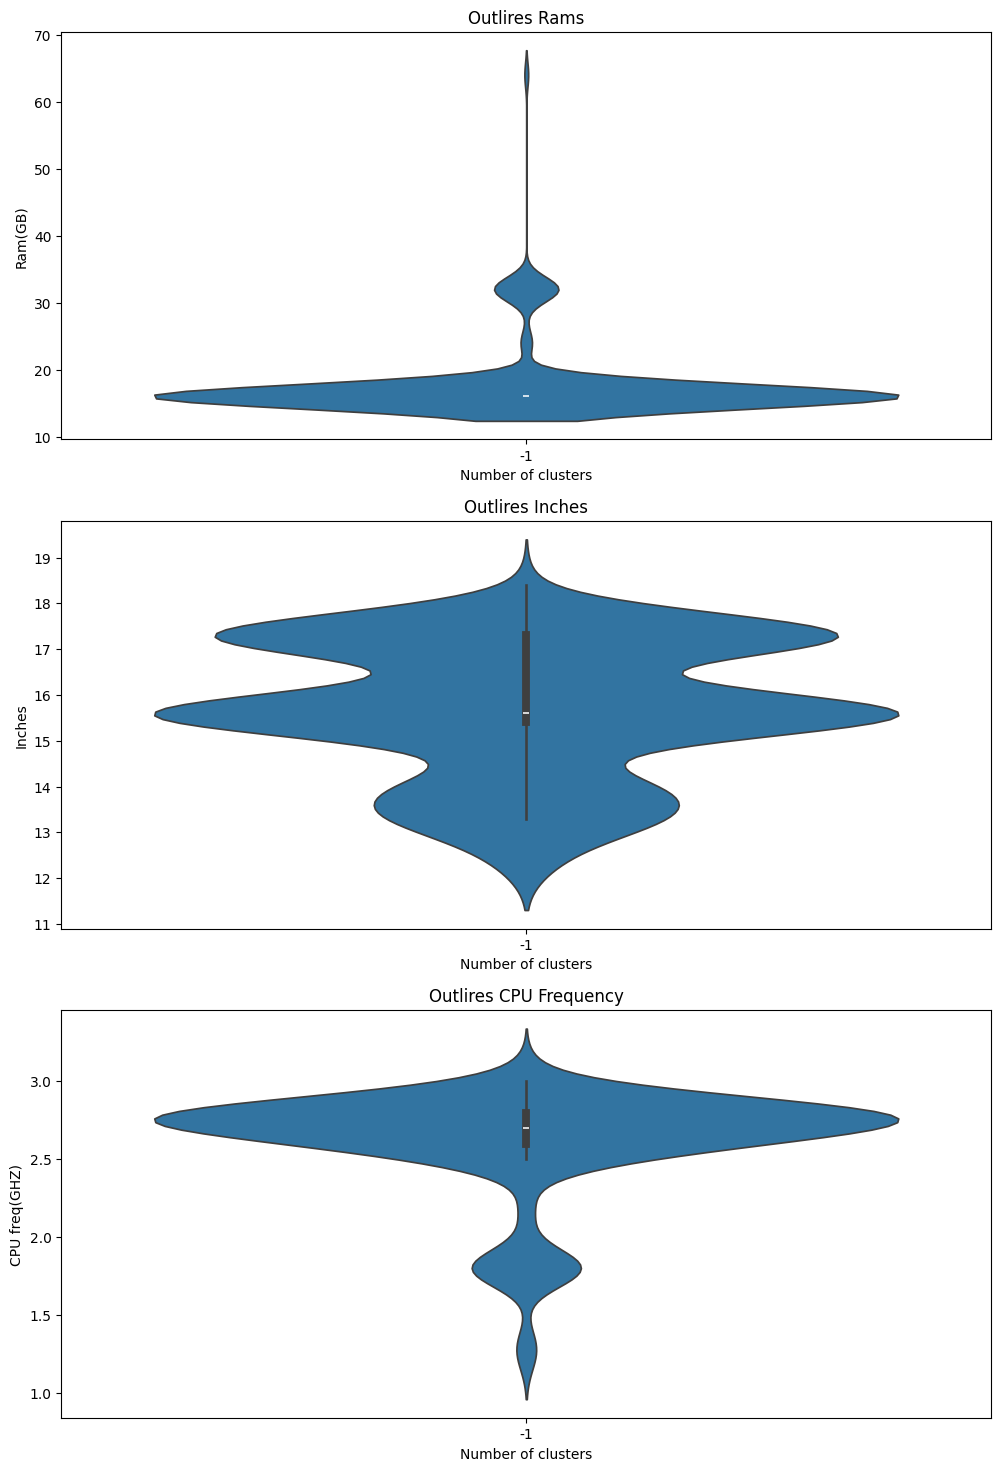

In [1088]:
plt.figure(figsize=(12,18))
plt.subplot(3,1,1)
sns.violinplot(x=Ram_outlires_df['Clusters'] , y=Ram_outlires_df['Ram'])
plt.title('Outlires Rams')
plt.ylabel('Ram(GB)')
plt.xlabel('Number of clusters')

plt.subplot(3,1,2)
sns.violinplot(x=Ram_outlires_df['Clusters'] , y=Ram_outlires_df['Inches'])
plt.title('Outlires Inches')
plt.ylabel('Inches')
plt.xlabel('Number of clusters')

plt.subplot(3,1,3)
sns.violinplot(x=Ram_outlires_df['Clusters'] , y=Ram_outlires_df['CPU_freq'])
plt.title('Outlires CPU Frequency')
plt.ylabel('CPU freq(GHZ)')
plt.xlabel('Number of clusters')

cluster -1(Normal): This laptops for light working and light games also they are small and easy to move 

In [1129]:
cluster_df = pd.concat([Ram_outlires_df , non_Ram_outlires_df])
cluster_df['Clusters'].head()

3    -1
6    -1
8    -1
12   -1
17   -1
Name: Clusters, dtype: int64

In [ ]:
#plotting the final results
cluster_labels_dict = {
    0 : 'High-End',
    1 : 'Mid Working',
    2 : 'Gaming',
    3 : 'Heavy Working',
    -1: 'Normal'
}

cluster_colors_dict = {
                  0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728' , # Red
                  -1: "#531E1E" # Brown
                } 

colors = cluster_df['Clusters'].map(cluster_colors_dict)
cluster_df['Clusters'] = cluster_df['Clusters'].map(cluster_labels_dict)

print(colors.unique())
print(cluster_df['Clusters'].unique())
labels= cluster_df['Clusters'].unique()

['#531E1E' '#2ca02c' '#1f77b4' '#000000' '#d62728']
['Normal' 'Gaming' 'High-End' 'Mid Working' 'Heavy Working']


Text(0.5, 0.92, '                                   Ram vs Inches vs CPU frequency                                   ')

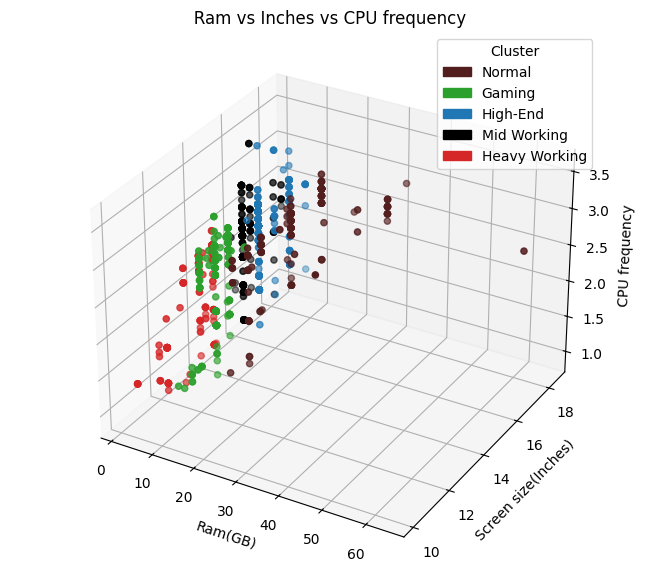

In [1138]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(projection='3d')
g =ax.scatter(
    'Ram',
    'Inches',
    'CPU_freq',
    data=cluster_df,
    c=colors
)
patches= [mpatches.Patch(
    color=colors.unique()[i],
    label=labels[i]
)
for i in range(5)
          ]

plt.legend(handles=patches ,title='Cluster')
ax.set_xlabel('Ram(GB)')
ax.set_ylabel('Screen size(Inches)')
ax.set_zlabel('CPU frequency')
ax.set_title(" "*35 + 'Ram vs Inches vs CPU frequency' + " "*35);
